### GET NEW TRAIN/TEST FILES

In [15]:
import os
import json
from collections import defaultdict

# Directory containing the JSON files
directory = 'VT2/vrdu/registration-form/few_shot-splits'  # Replace with the path to your JSON files
# Function to determine the level and template type based on the filename
def get_level_and_template(filename):
    level = 'lv1' if 'lv1' in filename else 'lv3'
    if 'Amendment' in filename:
        template = 'Amendment'
    elif 'Dissemination' in filename:
        template = 'Dissemination'
    elif 'Short-Form' in filename:
        template = 'Short-Form'
    else:
        template = None
    return level, template

# Data structure to store information
data = {
    'lv1': {
        'Amendment': {'train': [], 'test': set()},
        'Dissemination': {'train': [], 'test': set()},
        'Short-Form': {'train': [], 'test': set()},
    },
    'lv3': {
        'Amendment': {'train': [], 'test': set()},
        'Dissemination': {'train': [], 'test': set()},
        'Short-Form': {'train': [], 'test': set()},
    }
}

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = json.load(file)
            level, template = get_level_and_template(filename)
            
            if template:
                # Extract the first 5 examples from the train set
                train_examples = content.get('train', [])[:5]
                data[level][template]['train'].extend(train_examples)

                # Add all test examples to the test set for that level and template
                test_examples = content.get('test', [])
                data[level][template]['test'].update(test_examples)

# Find common test files across levels for each template
common_test_files = {
    'Amendment': set.intersection(data['lv1']['Amendment']['test'], data['lv3']['Amendment']['test']),
    'Dissemination': set.intersection(data['lv1']['Dissemination']['test'], data['lv3']['Dissemination']['test']),
    'Short-Form': set.intersection(data['lv1']['Short-Form']['test'], data['lv3']['Short-Form']['test']),
}

len(common_test_files['Amendment'])

126

In [16]:
len(common_test_files['Dissemination'])

102

In [17]:
len(common_test_files['Short-Form'])

119

In [12]:
import os
import json
from collections import defaultdict

# Directory containing the JSON files
directory = 'VT2/vrdu/registration-form/few_shot-splits'  # Replace with the path to your JSON files
# Function to determine the level and template type based on the filename
def get_level_and_template(filename):
    level = 'lv1' if 'lv1' in filename else 'lv3'
    if 'Amendment' in filename:
        template = 'Amendment'
    elif 'Dissemination' in filename:
        template = 'Dissemination'
    elif 'Short-Form' in filename:
        template = 'Short-Form'
    else:
        template = None
    return level, template

# Data structure to store information
data = {
    'lv1': {
        'Amendment': {'train': [], 'test': set()},
        'Dissemination': {'train': [], 'test': set()},
        'Short-Form': {'train': [], 'test': set()},
    },
    'lv3': {
        'Amendment': {'train': [], 'test': set()},
        'Dissemination': {'train': [], 'test': set()},
        'Short-Form': {'train': [], 'test': set()},
    }
}

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = json.load(file)
            level, template = get_level_and_template(filename)
            
            if template:
                # Extract the first 5 examples from the train set
                train_examples = content.get('train', [])[:5]
                data[level][template]['train'].extend(train_examples)

                # Add all test examples to the test set for that level and template
                test_examples = content.get('test', [])
                data[level][template]['test'].update(test_examples)

# Find common test files across levels for each template
common_test_files = {
    'Amendment': set.intersection(data['lv1']['Amendment']['test'], data['lv3']['Amendment']['test']),
    'Dissemination': set.intersection(data['lv1']['Dissemination']['test'], data['lv3']['Dissemination']['test']),
    'Short-Form': set.intersection(data['lv1']['Short-Form']['test'], data['lv3']['Short-Form']['test']),
}

# Limit common test files to 40
for template in common_test_files:
    common_test_files[template] = list(common_test_files[template])[:40]

# Create new JSON files for each level and template combination
output_directory = 'VT2/vrdu/registration-form/few_shot-splits/new'  # Replace with your desired output path
os.makedirs(output_directory, exist_ok=True)

for level in data:
    for template in data[level]:
        new_content = {
            'train': data[level][template]['train'],
            'test': common_test_files[template]
        }
        
        # Define output filename
        output_filename = f'FARA-{level}-{template}-combined.json'
        output_filepath = os.path.join(output_directory, output_filename)
        
        # Write the new JSON file
        with open(output_filepath, 'w') as output_file:
            json.dump(new_content, output_file, indent=4)

print("JSON files have been created successfully.")

JSON files have been created successfully.


In [15]:
import os
import json

# Directory containing the JSON files
directory = 'VT2/vrdu/registration-form/few_shot-splits/new'  # Replace with the path to your JSON files

# Function to determine the level and template type based on the filename
def get_level_and_template(filename):
    level = 'lv1' if 'lv1' in filename else 'lv3'
    if 'Amendment' in filename:
        template = 'Amendment'
    elif 'Dissemination' in filename:
        template = 'Dissemination'
    elif 'Short-Form' in filename:
        template = 'Short-Form'
    else:
        template = None
    return level, template

# Data structure to store test set information
test_data = {
    'Amendment': {
        'lv1': set(),
        'lv3': set(),
    },
    'Dissemination': {
        'lv1': set(),
        'lv3': set(),
    },
    'Short-Form': {
        'lv1': set(),
        'lv3': set(),
    }
}

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            content = json.load(file)
            level, template = get_level_and_template(filename)
            
            if template:
                # Add test examples to the test set for the appropriate level and template
                test_examples = content.get('test', [])
                test_data[template][level].update(test_examples)
                print(template)
                print(level)

# Compare test files between lv1 and lv3 for each template type
for template in test_data:
    lv1_test_files = test_data[template]['lv1']
    lv3_test_files = test_data[template]['lv3']

    # Find differences
    lv1_only = lv1_test_files - lv3_test_files
    lv3_only = lv3_test_files - lv1_test_files

    if not lv1_only and not lv3_only:
        print(f"All test files are the same for template '{template}' across levels.")
    else:
        print(f"Differences found for template '{template}':")
        if lv1_only:
            print(f"  Present in lv1 only: {sorted(lv1_only)}")
        if lv3_only:
            print(f"  Present in lv3 only: {sorted(lv3_only)}")



Short-Form
lv3
Amendment
lv3
Amendment
lv1
Dissemination
lv3
Short-Form
lv1
Dissemination
lv1
All test files are the same for template 'Amendment' across levels.
All test files are the same for template 'Dissemination' across levels.
All test files are the same for template 'Short-Form' across levels.


### EDIT EXPERIMENT RESULTS

#### EXPERIMENT WITH OCR INPUT

In [135]:
import pandas as pd
import glob

# Define the paths for experiment files and output path
input_path = "gpt4_outputs/reg/experiments2/"  # Path containing the experiment CSV files
output_file = "gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv"  # Path for the combined CSV file
all_experiment_combinations_file = "gpt4_outputs/reg/all_experiment_combinations.csv"  # Path to experiment combinations file

# Load all experiment combinations file to get level_type data
experiment_combinations_df = pd.read_csv(all_experiment_combinations_file)

# Fetch all experiment result CSV files in the directory
csv_files = glob.glob(input_path + "experiment_*_results.csv")

# Define the columns to retain and calculate overall averages for
columns_to_average = [
    "f1_initial_exact", "f1_initial_exact", 
    "f1_mapped_exact", "f1_mapped_exact", 
    "f1_cleaned_exact", "f1_cleaned_exact", 
    "f1_initial_substring", "f1_initial_substring", 
    "f1_mapped_substring", "f1_mapped_substring", 
    "f1_cleaned_substring", "f1_cleaned_substring", 
    "f1_initial_fuzzy", "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy", "f1_cleaned_fuzzy"
]

# Define additional columns to drop
columns_to_drop = [
    "file_name", "ground_truth", "cleaned_gt", "predictions", "mapped_pred", "cleaned_pred", 
    "precision_before", "precision_after", "recall_before", "recall_after", "f1_before", 
    "f1_after", "recall_after", "accuracy_before", "accuracy_after", "sample_num", "ocr_type", 
    "chunking_method", "overlap", "prompt_token_size", "template_type", "precision_initial_exact", "precision_initial_exact", 
    "precision_mapped_exact", "precision_mapped_exact", 
    "precision_cleaned_exact", "precision_cleaned_exact", 
    "recall_initial_exact", "recall_initial_exact", 
    "recall_mapped_exact", "recall_mapped_exact", 
    "recall_cleaned_exact", "recall_cleaned_exact", "precision_initial_substring", "precision_initial_substring", 
    "precision_mapped_substring", "precision_mapped_substring", 
    "precision_cleaned_substring", "precision_cleaned_substring", 
    "recall_initial_substring", "recall_initial_substring", 
    "recall_mapped_substring", "recall_mapped_substring", 
    "recall_cleaned_substring", "recall_cleaned_substring",  "precision_initial_fuzzy", "precision_initial_fuzzy", 
    "precision_mapped_fuzzy", "precision_mapped_fuzzy", 
    "precision_cleaned_fuzzy", "precision_cleaned_fuzzy", 
    "recall_initial_fuzzy", "recall_initial_fuzzy", 
    "recall_mapped_fuzzy", "recall_mapped_fuzzy", 
    "recall_cleaned_fuzzy", "recall_cleaned_fuzzy"
]

# Initialize an empty list to store processed data for each experiment
combined_data = []

# Process each CSV file and append the averaged results to the combined_data list
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop unnecessary columns and the first row for non-averaged columns
    df = df.drop(columns_to_drop, axis=1)
    df = df.iloc[1:].reset_index(drop=True)  # Drop first row for non-averaged columns
    
    # Calculate the average of the specified columns
    overall_averages = df[columns_to_average].mean().to_dict()
    
    # Add experiment_id and other columns from the first row to the result
    other_columns = df.drop(columns_to_average, axis=1).iloc[0].to_dict()
    combined_result = {**other_columns, **overall_averages}
    
    # Append the combined result to the list
    combined_data.append(combined_result)

# Create a new DataFrame from the combined results of all experiments
combined_df = pd.DataFrame(combined_data)

# Sort by experiment_id column to ensure correct order
combined_df = combined_df.sort_values(by="experiment_id").reset_index(drop=True)

# Merge combined_df with experiment_combinations_df on experiment_id to get level_type
combined_df = combined_df.merge(experiment_combinations_df[['experiment_id', 'level_type']], on='experiment_id', how='left')

# Save the combined data with level_type to a single CSV file
combined_df.to_csv(output_file, index=False)

print("Combined results with level_type saved to:", output_file)


Combined results with level_type saved to: gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv


In [136]:
import pandas as pd
import glob

# Define the paths for experiment files and output path
input_path = "llama3_70b_outputs/reg/experiments2/"  # Path containing the experiment CSV files
output_file = "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results.csv"  # Path for the combined CSV file

# Fetch all experiment result CSV files in the directory
csv_files = glob.glob(input_path + "experiment_*_results.csv")

# Define the columns to retain and calculate overall averages for
columns_to_average = [
    "f1_initial_exact", "f1_initial_exact", 
    "f1_mapped_exact", "f1_mapped_exact", 
    "f1_cleaned_exact", "f1_cleaned_exact", 
    "f1_initial_substring", "f1_initial_substring", 
    "f1_mapped_substring", "f1_mapped_substring", 
    "f1_cleaned_substring", "f1_cleaned_substring", 
    "f1_initial_fuzzy", "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy", "f1_cleaned_fuzzy"
]

# Define additional columns to drop
columns_to_drop = [
    "file_name", "ground_truth", "predictions", "mapped_pred", "cleaned_pred", "sample_num", "ocr_type", 
    "chunking_method", "overlap", "prompt_token_size", "precision_initial_exact", "precision_initial_exact", 
    "precision_mapped_exact", "precision_mapped_exact", 
    "precision_cleaned_exact", "precision_cleaned_exact", 
    "recall_initial_exact", "recall_initial_exact", 
    "recall_mapped_exact", "recall_mapped_exact", 
    "recall_cleaned_exact", "recall_cleaned_exact", "precision_initial_substring", "precision_initial_substring", 
    "precision_mapped_substring", "precision_mapped_substring", 
    "precision_cleaned_substring", "precision_cleaned_substring", 
    "recall_initial_substring", "recall_initial_substring", 
    "recall_mapped_substring", "recall_mapped_substring", 
    "recall_cleaned_substring", "recall_cleaned_substring",  "precision_initial_fuzzy", "precision_initial_fuzzy", 
    "precision_mapped_fuzzy", "precision_mapped_fuzzy", 
    "precision_cleaned_fuzzy", "precision_cleaned_fuzzy", 
    "recall_initial_fuzzy", "recall_initial_fuzzy", 
    "recall_mapped_fuzzy", "recall_mapped_fuzzy", 
    "recall_cleaned_fuzzy", "recall_cleaned_fuzzy"
]

# Initialize an empty list to store processed data for each experiment
combined_data = []

# Process each CSV file and append the averaged results to the combined_data list
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop unnecessary columns and the first row for non-averaged columns
    df = df.drop(columns_to_drop, axis=1)
    df = df.iloc[1:].reset_index(drop=True)  # Drop first row for non-averaged columns
    
    # Calculate the average of the specified columns
    overall_averages = df[columns_to_average].mean().to_dict()
    
    # Add experiment_id and other columns from the first row to the result
    other_columns = df.drop(columns_to_average, axis=1).iloc[0].to_dict()
    combined_result = {**other_columns, **overall_averages}
    
    # Append the combined result to the list
    combined_data.append(combined_result)

# Create a new DataFrame from the combined results of all experiments
combined_df = pd.DataFrame(combined_data)

# Sort by experiment_id column to ensure correct order
combined_df = combined_df.sort_values(by="experiment_id").reset_index(drop=True)

# Save the combined data with level_type to a single CSV file
combined_df.to_csv(output_file, index=False)

print("Combined results with level_type saved to:", output_file)


Combined results with level_type saved to: llama3_70b_outputs/reg/edited_experiments/combined_experiment_results.csv


#### EXPERIMENT WITH MARKDOWN INPUT

In [139]:
import pandas as pd
import glob

# Define the paths for experiment files and output path
input_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/experiments2/"  # Path containing the experiment CSV files
output_file = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv"  # Path for the combined CSV file
all_experiment_combinations_file = "VT2/gpt4_Markdown_gpt4_outputs/reg/all_experiment_combinations.csv"  # Path to experiment combinations file

# Load all experiment combinations file to get level_type data
experiment_combinations_df = pd.read_csv(all_experiment_combinations_file)

# Fetch all experiment result CSV files in the directory
csv_files = glob.glob(input_path + "experiment_*_results.csv")

# Define the columns to retain and calculate overall averages for
columns_to_average = [
    "f1_initial_exact", "f1_initial_exact", 
    "f1_mapped_exact", "f1_mapped_exact", 
    "f1_cleaned_exact", "f1_cleaned_exact", 
    "f1_initial_substring", "f1_initial_substring", 
    "f1_mapped_substring", "f1_mapped_substring", 
    "f1_cleaned_substring", "f1_cleaned_substring", 
    "f1_initial_fuzzy", "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy", "f1_cleaned_fuzzy"
]

# Define additional columns to drop
columns_to_drop = [
    "file_name", "ground_truth", "predictions", "mapped_pred", "cleaned_pred", 
    "precision_before", "precision_after", "recall_before", "recall_after", "f1_before", 
    "f1_after", "recall_after", "accuracy_before", "accuracy_after", "sample_num", 
    "chunking_method", "overlap", "prompt_token_size", "template_type", "precision_initial_exact", "precision_initial_exact", 
    "precision_mapped_exact", "precision_mapped_exact", 
    "precision_cleaned_exact", "precision_cleaned_exact", 
    "recall_initial_exact", "recall_initial_exact", 
    "recall_mapped_exact", "recall_mapped_exact", 
    "recall_cleaned_exact", "recall_cleaned_exact", "precision_initial_substring", "precision_initial_substring", 
    "precision_mapped_substring", "precision_mapped_substring", 
    "precision_cleaned_substring", "precision_cleaned_substring", 
    "recall_initial_substring", "recall_initial_substring", 
    "recall_mapped_substring", "recall_mapped_substring", 
    "recall_cleaned_substring", "recall_cleaned_substring",  "precision_initial_fuzzy", "precision_initial_fuzzy", 
    "precision_mapped_fuzzy", "precision_mapped_fuzzy", 
    "precision_cleaned_fuzzy", "precision_cleaned_fuzzy", 
    "recall_initial_fuzzy", "recall_initial_fuzzy", 
    "recall_mapped_fuzzy", "recall_mapped_fuzzy", 
    "recall_cleaned_fuzzy", "recall_cleaned_fuzzy"
]

# Initialize an empty list to store processed data for each experiment
combined_data = []

# Process each CSV file and append the averaged results to the combined_data list
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop unnecessary columns and the first row for non-averaged columns
    df = df.drop(columns_to_drop, axis=1)
    df = df.iloc[1:].reset_index(drop=True)  # Drop first row for non-averaged columns
    
    # Calculate the average of the specified columns
    overall_averages = df[columns_to_average].mean().to_dict()
    
    # Add experiment_id and other columns from the first row to the result
    other_columns = df.drop(columns_to_average, axis=1).iloc[0].to_dict()
    combined_result = {**other_columns, **overall_averages}
    
    # Append the combined result to the list
    combined_data.append(combined_result)

# Create a new DataFrame from the combined results of all experiments
combined_df = pd.DataFrame(combined_data)

# Sort by experiment_id column to ensure correct order
combined_df = combined_df.sort_values(by="experiment_id").reset_index(drop=True)

# Merge combined_df with experiment_combinations_df on experiment_id to get level_type
combined_df = combined_df.merge(experiment_combinations_df[['experiment_id', 'level_type']], on='experiment_id', how='left')

# Save the combined data with level_type to a single CSV file
combined_df.to_csv(output_file, index=False)

print("Combined results with level_type saved to:", output_file)


Combined results with level_type saved to: VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv


In [140]:
import pandas as pd
import glob

# Define the paths for experiment files and output path
input_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/experiments2/"  # Path containing the experiment CSV files
output_file = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results.csv"  # Path for the combined CSV file

# Fetch all experiment result CSV files in the directory
csv_files = glob.glob(input_path + "experiment_*_results.csv")

# Define the columns to retain and calculate overall averages for
columns_to_average = [
    "f1_initial_exact", "f1_initial_exact", 
    "f1_mapped_exact", "f1_mapped_exact", 
    "f1_cleaned_exact", "f1_cleaned_exact", 
    "f1_initial_substring", "f1_initial_substring", 
    "f1_mapped_substring", "f1_mapped_substring", 
    "f1_cleaned_substring", "f1_cleaned_substring", 
    "f1_initial_fuzzy", "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy", "f1_cleaned_fuzzy"
]

# Define additional columns to drop
columns_to_drop = [
    "file_name", "ground_truth", "predictions", "mapped_pred", "cleaned_pred", "sample_num", 
    "chunking_method", "overlap", "prompt_token_size", "precision_initial_exact", "precision_initial_exact", 
    "precision_mapped_exact", "precision_mapped_exact", 
    "precision_cleaned_exact", "precision_cleaned_exact", 
    "recall_initial_exact", "recall_initial_exact", 
    "recall_mapped_exact", "recall_mapped_exact", 
    "recall_cleaned_exact", "recall_cleaned_exact", "precision_initial_substring", "precision_initial_substring", 
    "precision_mapped_substring", "precision_mapped_substring", 
    "precision_cleaned_substring", "precision_cleaned_substring", 
    "recall_initial_substring", "recall_initial_substring", 
    "recall_mapped_substring", "recall_mapped_substring", 
    "recall_cleaned_substring", "recall_cleaned_substring",  "precision_initial_fuzzy", "precision_initial_fuzzy", 
    "precision_mapped_fuzzy", "precision_mapped_fuzzy", 
    "precision_cleaned_fuzzy", "precision_cleaned_fuzzy", 
    "recall_initial_fuzzy", "recall_initial_fuzzy", 
    "recall_mapped_fuzzy", "recall_mapped_fuzzy", 
    "recall_cleaned_fuzzy", "recall_cleaned_fuzzy"
]
# Initialize an empty list to store processed data for each experiment
combined_data = []

# Process each CSV file and append the averaged results to the combined_data list
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Drop unnecessary columns and the first row for non-averaged columns
    df = df.drop(columns_to_drop, axis=1)
    df = df.iloc[1:].reset_index(drop=True)  # Drop first row for non-averaged columns
    
    # Calculate the average of the specified columns
    overall_averages = df[columns_to_average].mean().to_dict()
    
    # Add experiment_id and other columns from the first row to the result
    other_columns = df.drop(columns_to_average, axis=1).iloc[0].to_dict()
    combined_result = {**other_columns, **overall_averages}
    
    # Append the combined result to the list
    combined_data.append(combined_result)

# Create a new DataFrame from the combined results of all experiments
combined_df = pd.DataFrame(combined_data)

# Sort by experiment_id column to ensure correct order
combined_df = combined_df.sort_values(by="experiment_id").reset_index(drop=True)

# Save the combined data with level_type to a single CSV file
combined_df.to_csv(output_file, index=False)

print("Combined results with level_type saved to:", output_file)


Combined results with level_type saved to: VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results.csv


#### Add chunk_size_category_column

In [141]:
import pandas as pd

# Paths to the files
llama3_results_path = "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results.csv"
gpt4_results_path = "gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv"
gpt35_results_path = "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results.csv"
all_experiments_path = "gpt3.5_outputs/reg/all_experiment_combinations.csv"

# Read the files into dataframes
llama3_df = pd.read_csv(llama3_results_path)
gpt4_df = pd.read_csv(gpt4_results_path)
gpt35_df = pd.read_csv(gpt35_results_path)
all_experiments_df = pd.read_csv(all_experiments_path)

# Merge the chunk_size_category into the other dataframes
llama3_df = pd.merge(llama3_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')
gpt4_df = pd.merge(gpt4_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')
gpt35_df = pd.merge(gpt35_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')

llama3_results_path = "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt4_results_path = "gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt35_results_path = "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results2.csv"

# Save the updated dataframes back to their respective paths
llama3_df.to_csv(llama3_results_path, index=False)
gpt4_df.to_csv(gpt4_results_path, index=False)
gpt35_df.to_csv(gpt35_results_path, index=False)

print("Chunk size category successfully merged!")


Chunk size category successfully merged!


In [142]:
import pandas as pd

# Paths to the files
llama3_results_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results.csv"
gpt4_results_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv"
gpt35_results_path = "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results.csv"

# Read the files into dataframes
llama3_df = pd.read_csv(llama3_results_path)
gpt4_df = pd.read_csv(gpt4_results_path)
gpt35_df = pd.read_csv(gpt35_results_path)
all_experiments_df = pd.read_csv(all_experiments_path)

# Merge the chunk_size_category into the other dataframes
llama3_df = pd.merge(llama3_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')
gpt4_df = pd.merge(gpt4_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')
gpt35_df = pd.merge(gpt35_df, all_experiments_df[['experiment_id', 'chunk_size_category']], on='experiment_id', how='left')

llama3_results_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt4_results_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt35_results_path = "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv"

# Save the updated dataframes back to their respective paths
llama3_df.to_csv(llama3_results_path, index=False)
gpt4_df.to_csv(gpt4_results_path, index=False)
gpt35_df.to_csv(gpt35_results_path, index=False)

print("Chunk size category successfully merged!")


Chunk size category successfully merged!


#### Get Specific Experiment Results

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'gpt3.5_outputs/reg/all_experiment_combinations.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Filter rows with specific experiment IDs
experiment_ids = [0, 32, 74, 93, 53]
filtered_df = df[df['experiment_id'].isin(experiment_ids)]
print(filtered_df)

# Select only the desired columns
columns_to_keep = ['experiment_id', 'prompt_type', 'chunk_size_category', 'example_num', 'transformation_method', 'level_type']
filtered_df = filtered_df[columns_to_keep]
filtered_df = filtered_df.sort_values(by='experiment_id')

# Save the filtered data to a new CSV file
output_path = 'gpt3.5_outputs/reg/selected_exp_result.csv'
filtered_df.to_csv(output_path, index=False)

print(f"Filtered data saved to {output_path}")


    experiment_id  sample_size  use_custom_ocr       prompt_type  \
0               0           40           False         no_schema   
32             32           40           False          few_shot   
53             53           40           False          few_shot   
74             74           40           False  chain_of_thought   
93             93           40           False  chain_of_thought   

   chunk_size_category  no_schema  example_num transformation_method  \
0                  max       True          NaN          layout-aware   
32              medium      False          3.0          layout-aware   
53               small      False          0.0                 naive   
74                 max      False          5.0          layout-aware   
93               small      False          0.0                 naive   

   chunking_method level_type  
0            fixed        STL  
32           fixed        STL  
53           fixed        UTL  
74           fixed        UTL 

In [9]:
import pandas as pd

# Load the CSV file with the selected experiment results
selected_file_path = 'gpt3.5_outputs/reg/selected_exp_result.csv'
selected_df = pd.read_csv(selected_file_path)

# Load the CSV file with the metric results
metrics_file_path = 'gpt3.5_outputs/reg/gpt3.5-results.csv'  # Replace with the path to your metrics CSV file
metrics_df = pd.read_csv(metrics_file_path)

metrics_df['experiment_id_number'] = metrics_df['experiment_id'].str.extract(r'(\d+)').astype(int)

# Filter the metrics_df for the experiment IDs of interest
experiment_ids = [0, 32, 74, 93, 53]
filtered_metrics_df = metrics_df[metrics_df['experiment_id_number'].isin(experiment_ids)]

# Now merge the selected experiment results with the filtered metrics
merged_df = pd.merge(selected_df, filtered_metrics_df, left_on='experiment_id', right_on='experiment_id_number', how='left')

# Drop the extra 'experiment_id_y' column and 'experiment_id_number' column
merged_df = merged_df.drop(columns=['experiment_id_y', 'experiment_id_number'])

# Rename 'experiment_id_x' to 'experiment_id' for consistency
merged_df = merged_df.rename(columns={'experiment_id_x': 'experiment_id'})

# Sort the DataFrame by 'experiment_id' and 'example_num'
merged_df = merged_df.sort_values(by=['experiment_id', 'example_num'])

# Save the merged and sorted data to a new CSV file
output_path = 'gpt3.5_outputs/reg/merged_exp_result.csv'
merged_df.to_csv(output_path, index=False)

print(f"Merged and sorted data saved to {output_path}")

Merged and sorted data saved to gpt3.5_outputs/reg/merged_exp_result.csv


#### Delete

In [12]:
import pandas as pd

# Load the CSV file
file_path = "llama3_70b_outputs/reg/llama3-70b-metrics.csv"  # Replace with your file's path
df = pd.read_csv(file_path)

# Remove rows where 'transformation_method' is 'layout-aware'
filtered_df = df[df['transformation_method'] != 'layout-aware']

# Save the result to a new CSV file
filtered_df.to_csv("llama3_70b_outputs/reg/filtered-llama3-70b-metrics.csv", index=False)


In [13]:
import pandas as pd

# Load the CSV file
file_path = "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results.csv"  # Replace with your file's path
df = pd.read_csv(file_path)

# Remove rows where 'transformation_method' is 'layout-aware'
filtered_df = df[df['transformation_method'] != 'layout-aware']

# Save the result to a new CSV file
filtered_df.to_csv("llama3_70b_outputs/reg/edited_experiments/filtered-combined_experiment_results.csv", index=False)


### Paper Questions

#### Update fıle_dates for Fuzzy match

In [126]:
import pandas as pd
import ast
import os
import glob

# List of directories containing CSV files
dirs = [
    "gpt3.5_outputs/reg/experiments2",
    "gpt4_outputs/reg/experiments2",
    "llama3_70b_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_gpt3_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_gpt4_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_Llama3_outputs/reg/experiments2",
    "VT2/gpt4_outputs_Image/reg/experiments2"
]

# Define column mapping
column_mapping = {
    'match_results_initial_fuzzy': 'match_results_initial_exact',
    'match_results_mapped_fuzzy': 'match_results_mapped_exact',
    'match_results_cleaned_fuzzy': 'match_results_cleaned_exact'
}

# Function to update 'file_date' key in fuzzy columns
def update_file_date(df, fuzzy_col, exact_col):
    for i in range(len(df)):
        try:
            fuzzy_dict = ast.literal_eval(df.at[i, fuzzy_col]) if pd.notna(df.at[i, fuzzy_col]) else {}
            exact_dict = ast.literal_eval(df.at[i, exact_col]) if pd.notna(df.at[i, exact_col]) else {}

            if isinstance(fuzzy_dict, dict) and isinstance(exact_dict, dict) and 'file_date' in exact_dict:
                fuzzy_dict['file_date'] = exact_dict['file_date']
                df.at[i, fuzzy_col] = str(fuzzy_dict)  # Convert back to string
        except Exception as e:
            print(f"Error processing row {i} in column {fuzzy_col}: {e}")

# Iterate over all directories
for dir_path in dirs:
    # Get all CSV files in the directory
    csv_files = glob.glob(os.path.join(dir_path, "*.csv"))

    for file_path in csv_files:
        print(f"Processing file: {file_path}")

        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Apply updates to relevant columns
            for fuzzy_col, exact_col in column_mapping.items():
                if fuzzy_col in df.columns and exact_col in df.columns:
                    update_file_date(df, fuzzy_col, exact_col)

            # Overwrite the existing file
            df.to_csv(file_path, index=False)
            print(f"Updated file saved: {file_path}")

        except Exception as e:
            print(f"Failed to process {file_path}: {e}")

print("Batch processing complete!")


Processing file: gpt3.5_outputs/reg/experiments2/experiment_56_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_56_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_67_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_67_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_42_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_42_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_32_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_32_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_40_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_40_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_49_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_49_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_19_results.csv
Updated

#### Update scores for fuzzy

In [133]:
import pandas as pd
import ast
import os
import glob
from collections import defaultdict
from typing import Dict, Union, Tuple, List

# List of directories containing CSV files
dirs = [
    "gpt3.5_outputs/reg/experiments2",
    "gpt4_outputs/reg/experiments2",
    "llama3_70b_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_gpt3_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_gpt4_outputs/reg/experiments2",
    "VT2/gpt4_Markdown_Llama3_outputs/reg/experiments2",
    "VT2/gpt4_outputs_Image/reg/experiments2"
]

# Define schema
defined_schema = {
    "file_date": r'\d{4}-\d{2}-\d{2}',  
    "foreign_principle_name": r'[\w\s.,\'&-]+',
    "registrant_name": r'[\w\s.,\'&-]+',  
    "registration_num": r'\d+',  
    "signer_name": r'[\w\s\'.-]+',  
    "signer_title": r'[\w\s.,\'&-]+',  
}

# Function to parse dictionary columns
def parse_dict_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else {})

# Function to calculate schema metrics
def calculate_schema_metrics(
    ground_truth_list: List[Dict[str, Union[str, Tuple[str], List[str]]]],
    predictions_list: List[Dict[str, Union[str, Tuple[str], List[str]]]],
) -> Dict[str, Dict[str, Union[float, int]]]:
    schema_metrics = defaultdict(lambda: {"tp": 0, "fp": 0, "fn": 0})

    for ground_truth, predictions in zip(ground_truth_list, predictions_list):
        if not isinstance(ground_truth, dict) or not isinstance(predictions, dict):
            continue

        for gt_key, gt_value in ground_truth.items():
            if gt_key in defined_schema.keys() and gt_value not in [None, ""]:
                pred_value = predictions.get(gt_key, None)
                if pred_value in [None, ""]:  
                    schema_metrics[gt_key]["fn"] += 1
                else:
                    if pred_value == 1:
                        schema_metrics[gt_key]["tp"] += 1
                    else:
                        schema_metrics[gt_key]["fp"] += 1

        for pred_key, pred_value in predictions.items():
            if pred_key not in defined_schema.keys():
                schema_metrics[pred_key]["fp"] += 1

    metrics = {}
    for key, counts in schema_metrics.items():
        tp = counts["tp"]
        fp = counts["fp"]
        fn = counts["fn"]
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

        metrics[key] = {"precision": precision, "recall": recall, "f1": f1, "tp": tp, "fp": fp, "fn": fn}

    total_tp = sum(counts["tp"] for counts in schema_metrics.values())
    total_fp = sum(counts["fp"] for counts in schema_metrics.values())
    total_fn = sum(counts["fn"] for counts in schema_metrics.values())

    overall_precision = total_tp / (total_tp + total_fp) if total_tp + total_fp > 0 else 0
    overall_recall = total_tp / (total_tp + total_fn) if total_tp + total_fn > 0 else 0
    overall_f1 = 2 * overall_precision * overall_recall / (overall_precision + overall_recall) if overall_precision + overall_recall > 0 else 0

    metrics["overall"] = {"precision": overall_precision, "recall": overall_recall, "f1": overall_f1}

    return metrics

# Process all CSV files in each directory
for dir_path in dirs:
    csv_files = glob.glob(os.path.join(dir_path, "*.csv"))

    for file_path in csv_files:
        print(f"Processing file: {file_path}")

        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Parse dictionary columns
            df["match_results_initial_fuzzy"] = parse_dict_column(df["match_results_initial_fuzzy"])
            df["match_results_mapped_fuzzy"] = parse_dict_column(df["match_results_mapped_fuzzy"])
            df["match_results_cleaned_fuzzy"] = parse_dict_column(df["match_results_cleaned_fuzzy"])
            df["ground_truth"] = parse_dict_column(df["ground_truth"])
            df["cleaned_gt"] = parse_dict_column(df["cleaned_gt"])

            # Compute metrics across all rows
            initial_pred_metrics = calculate_schema_metrics(df["ground_truth"].tolist(), df["match_results_initial_fuzzy"].tolist())
            mapped_pred_metrics = calculate_schema_metrics(df["ground_truth"].tolist(), df["match_results_mapped_fuzzy"].tolist())
            cleaned_pred_metrics = calculate_schema_metrics(df["cleaned_gt"].tolist(), df["match_results_cleaned_fuzzy"].tolist())

            # Add new metrics columns
            df["precision_initial_fuzzy"] = initial_pred_metrics["overall"]["precision"]
            df["precision_mapped_fuzzy"] = mapped_pred_metrics["overall"]["precision"]
            df["precision_cleaned_fuzzy"] = cleaned_pred_metrics["overall"]["precision"]
            df["recall_initial_fuzzy"] = initial_pred_metrics["overall"]["recall"]
            df["recall_mapped_fuzzy"] = mapped_pred_metrics["overall"]["recall"]
            df["recall_cleaned_fuzzy"] = cleaned_pred_metrics["overall"]["recall"]
            df["f1_initial_fuzzy"] = initial_pred_metrics["overall"]["f1"]
            df["f1_mapped_fuzzy"] = mapped_pred_metrics["overall"]["f1"]
            df["f1_cleaned_fuzzy"] = cleaned_pred_metrics["overall"]["f1"]

            # Overwrite the existing file
            df.to_csv(file_path, index=False)
            print(f"Updated file saved: {file_path}")

        except Exception as e:
            print(f"Failed to process {file_path}: {e}")

print("Batch processing complete!")


Processing file: gpt3.5_outputs/reg/experiments2/experiment_56_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_56_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_67_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_67_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_42_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_42_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_32_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_32_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_40_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_40_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_49_results.csv
Updated file saved: gpt3.5_outputs/reg/experiments2/experiment_49_results.csv
Processing file: gpt3.5_outputs/reg/experiments2/experiment_19_results.csv
Updated

#### Baseline
Input: OCR --> medium size chunking --> few-shot prompt --> 0 example num --> initial_pred --> exact match

In [119]:
import pandas as pd

# Load the experiment results files
llama3_results_path = "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt4_results_path = "gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt35_results_path = "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results2.csv"

llama3_results = pd.read_csv(llama3_results_path)
gpt4_results = pd.read_csv(gpt4_results_path)
gpt35_results = pd.read_csv(gpt35_results_path)

# Load the uploaded CSV files
file_paths = {
    "llama3": "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt4": "gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt3.5": "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results2.csv"
}

# Read the files into pandas DataFrames
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display basic information and the first few rows of each DataFrame to understand their structure
{model: df.head() for model, df in dataframes.items()}

# Concatenate all datasets into a single DataFrame for analysis, adding a 'model' column
for model, df in dataframes.items():
    df['model'] = model

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df['example_num'] = combined_df['example_num'].fillna(0)
combined_df['example_num'] = combined_df['example_num'].replace('', 0)
combined_df['example_num'] = combined_df['example_num'].astype(int)


# Separate columns for easier reference
performance_columns = [
    "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"
]


In [120]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'medium') &
    (combined_df['prompt_type'] == 'few_shot') &
    (combined_df['example_num'] == 0)]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'OCR'


# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_1194070/1583117417.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
28,28,llama3,STL,1421,medium,few_shot,0,OCR,0.632011,0.632011,0.718927,0.654435,0.654435,0.730213,0.720178,0.720178,0.772193
29,29,llama3,STL,1421,medium,few_shot,0,OCR,0.649776,0.649776,0.729665,0.669551,0.669551,0.738856,0.733844,0.733844,0.783158
36,36,llama3,UTL,1421,medium,few_shot,0,OCR,0.639199,0.639199,0.730426,0.664469,0.664469,0.739616,0.722652,0.722652,0.778013
37,37,llama3,UTL,1421,medium,few_shot,0,OCR,0.641700,0.641700,0.721255,0.661261,0.661261,0.730566,0.724062,0.724062,0.774125
136,28,gpt4,STL,1421,medium,few_shot,0,OCR,0.668921,0.668921,0.749106,0.689369,0.689369,0.761458,0.750270,0.750270,0.797086
137,29,gpt4,STL,1421,medium,few_shot,0,OCR,0.672122,0.672122,0.749086,0.691370,0.691370,0.759117,0.751620,0.751620,0.797086
144,36,gpt4,UTL,1421,medium,few_shot,0,OCR,0.658597,0.658597,0.740783,0.677844,0.677844,0.749693,0.743478,0.743478,0.790795
145,37,gpt4,UTL,1421,medium,few_shot,0,OCR,0.660838,0.660838,0.741823,0.680085,0.680085,0.750734,0.744843,0.744843,0.792059
244,28,gpt3.5,STL,1421,medium,few_shot,0,OCR,0.649560,0.649560,0.737208,0.682373,0.682373,0.758397,0.728273,0.728273,0.780591
245,29,gpt3.5,STL,1421,medium,few_shot,0,OCR,0.651981,0.651981,0.738782,0.684414,0.684414,0.760157,0.732456,0.732456,0.783158


In [121]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
0,gpt3.5,STL,medium,few_shot,0,OCR,0.650770,0.650770,0.737995,0.683393,0.683393,0.759277,0.730364,0.730364,0.781874
1,gpt3.5,UTL,medium,few_shot,0,OCR,0.645978,0.645978,0.733457,0.682193,0.682193,0.758407,0.726170,0.726170,0.777366
2,gpt4,STL,medium,few_shot,0,OCR,0.670522,0.670522,0.749096,0.690369,0.690369,0.760287,0.750945,0.750945,0.797086
3,gpt4,UTL,medium,few_shot,0,OCR,0.659717,0.659717,0.741303,0.678965,0.678965,0.750213,0.744160,0.744160,0.791427
4,llama3,STL,medium,few_shot,0,OCR,0.640894,0.640894,0.724296,0.661993,0.661993,0.734534,0.727011,0.727011,0.777675
5,llama3,UTL,medium,few_shot,0,OCR,0.640449,0.640449,0.725840,0.662865,0.662865,0.735091,0.723357,0.723357,0.776069


#### Chosen Configuration

Input: OCR --> medium size chunking --> few-shot with 0 example --> cleaned_pred --> fuzzy match

In [122]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'max') &
    (combined_df['prompt_type'] == 'few_shot') &
    (combined_df['example_num'] == 0)
]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'OCR'

    

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_1194070/167109478.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
12,12,llama3,STL,2996,max,few_shot,0,OCR,0.639812,0.639812,0.719581,0.662988,0.662988,0.731773,0.725469,0.725469,0.775424
13,13,llama3,STL,2996,max,few_shot,0,OCR,0.655720,0.655720,0.737871,0.678615,0.678615,0.749198,0.743226,0.743226,0.793061
20,20,llama3,UTL,2996,max,few_shot,0,OCR,0.648909,0.648909,0.734107,0.668384,0.668384,0.742717,0.731065,0.731065,0.781876
21,21,llama3,UTL,2996,max,few_shot,0,OCR,0.639339,0.639339,0.710531,0.662028,0.662028,0.726711,0.722652,0.722652,0.770213
120,12,gpt4,STL,2996,max,few_shot,0,OCR,0.676604,0.676604,0.755169,0.695852,0.695852,0.766320,0.754310,0.754310,0.800830
121,13,gpt4,STL,2996,max,few_shot,0,OCR,0.672362,0.672362,0.748706,0.691610,0.691610,0.758737,0.751620,0.751620,0.797086
128,20,gpt4,UTL,2996,max,few_shot,0,OCR,0.656596,0.656596,0.736961,0.675844,0.675844,0.746992,0.740741,0.740741,0.788260
129,21,gpt4,UTL,2996,max,few_shot,0,OCR,0.658597,0.658597,0.737982,0.677844,0.677844,0.748013,0.742111,0.742111,0.789529
228,12,gpt3.5,STL,2996,max,few_shot,0,OCR,0.643958,0.643958,0.732886,0.680972,0.680972,0.755876,0.725469,0.725469,0.778013
229,13,gpt3.5,STL,2996,max,few_shot,0,OCR,0.647239,0.647239,0.734687,0.682773,0.682773,0.758597,0.724062,0.724062,0.776720


In [123]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_cleaned_fuzzy
0,gpt3.5,STL,max,few_shot,0,OCR,0.777366
1,gpt3.5,UTL,max,few_shot,0,OCR,0.776072
2,gpt4,STL,max,few_shot,0,OCR,0.798958
3,gpt4,UTL,max,few_shot,0,OCR,0.788894
4,llama3,STL,max,few_shot,0,OCR,0.784242
5,llama3,UTL,max,few_shot,0,OCR,0.776044


Input: Markdwon --> medium size chunking --> cot with 0 example --> cleaned_pred --> fuzzy match

In [107]:
import pandas as pd

# Load the experiment results files
llama3_results_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt4_results_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt35_results_path = "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv"

llama3_results = pd.read_csv(llama3_results_path)
gpt4_results = pd.read_csv(gpt4_results_path)
gpt35_results = pd.read_csv(gpt35_results_path)

# Load the uploaded CSV files
file_paths = {
    "llama3": "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt4": "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt3.5": "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv"
}

# Read the files into pandas DataFrames
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display basic information and the first few rows of each DataFrame to understand their structure
{model: df.head() for model, df in dataframes.items()}

# Concatenate all datasets into a single DataFrame for analysis, adding a 'model' column
for model, df in dataframes.items():
    df['model'] = model

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df['example_num'] = combined_df['example_num'].fillna(0)
combined_df['example_num'] = combined_df['example_num'].replace('', 0)
combined_df['example_num'] = combined_df['example_num'].astype(int)

# Separate columns for easier reference
performance_columns = [
            "f1_cleaned_substring"
]


In [108]:
combined_df

,experiment_id,model_IE,model_Markdown_Generation,processing_time,dataset,chunk_size,prompt_type,example_num,level_type,transformation_method,...,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy,chunk_size_category,model,model_name
0,0,llama3-70b-8192,gpt-4o,0.62,vrdu,2958,no_schema,0,STL,layout-aware,...,0.721171,0.659640,0.659640,0.723539,0.744843,0.744843,0.790795,max,llama3,NaN
1,1,llama3-70b-8192,gpt-4o,0.52,vrdu,2958,no_schema,0,STL,naive,...,0.717570,0.655799,0.655799,0.719938,0.742111,0.742111,0.788260,max,llama3,NaN
2,2,llama3-70b-8192,gpt-4o,0.62,vrdu,2958,no_schema,0,UTL,layout-aware,...,0.718891,0.663942,0.663942,0.721258,0.742111,0.742111,0.788260,max,llama3,NaN
3,3,llama3-70b-8192,gpt-4o,5.18,vrdu,2958,no_schema,0,UTL,naive,...,0.722892,0.665343,0.665343,0.725260,0.743478,0.743478,0.788260,max,llama3,NaN
4,4,llama3-70b-8192,gpt-4o,5.35,vrdu,1383,no_schema,0,STL,layout-aware,...,0.721705,0.663882,0.663882,0.724039,0.751620,0.751620,0.792059,medium,llama3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,103,NaN,NaN,NaN,NaN,633,chain_of_thought,1,UTL,naive,...,0.655118,0.577687,0.577687,0.672619,0.671264,0.671264,0.742111,small,gpt3.5,gpt-3.5-turbo
320,104,NaN,NaN,NaN,NaN,633,chain_of_thought,3,UTL,layout-aware,...,0.675387,0.572549,0.572549,0.691526,0.665127,0.665127,0.756989,small,gpt3.5,gpt-3.5-turbo
321,105,NaN,NaN,NaN,NaN,633,chain_of_thought,3,UTL,naive,...,0.675006,0.572029,0.572029,0.691146,0.665127,0.665127,0.755651,small,gpt3.5,gpt-3.5-turbo
322,106,NaN,NaN,NaN,NaN,633,chain_of_thought,5,UTL,layout-aware,...,0.677347,0.566160,0.566160,0.693487,0.657375,0.657375,0.756989,small,gpt3.5,gpt-3.5-turbo


In [111]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'medium') &
    (combined_df['prompt_type'] == 'chain_of_thought') &
    (combined_df['example_num'] == 0)
]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'Markdown'

    

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_1194070/518137321.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
76,76,llama3,STL,1421,medium,chain_of_thought,0,Markdown,0.661134,0.661134,0.722872,0.665903,0.665903,0.724039,0.751620,0.751620,0.790795
77,77,llama3,STL,1421,medium,chain_of_thought,0,Markdown,0.654091,0.654091,0.722385,0.667163,0.667163,0.725920,0.751620,0.751620,0.790795
84,84,llama3,UTL,1421,medium,chain_of_thought,0,Markdown,0.660587,0.660587,0.723833,0.667723,0.667723,0.725000,0.746204,0.746204,0.789529
85,85,llama3,UTL,1421,medium,chain_of_thought,0,Markdown,0.658126,0.658126,0.723372,0.666463,0.666463,0.727241,0.744843,0.744843,0.789529
184,76,gpt4,STL,1421,medium,chain_of_thought,0,Markdown,0.636664,0.636664,0.715863,0.652217,0.652217,0.721798,0.743478,0.743478,0.781876
185,77,gpt4,STL,1421,medium,chain_of_thought,0,Markdown,0.638905,0.638905,0.718104,0.654458,0.654458,0.724039,0.744843,0.744843,0.783158
192,84,gpt4,UTL,1421,medium,chain_of_thought,0,Markdown,0.637805,0.637805,0.707679,0.647082,0.647082,0.711514,0.731065,0.731065,0.772824
193,85,gpt4,UTL,1421,medium,chain_of_thought,0,Markdown,0.628841,0.628841,0.701517,0.638118,0.638118,0.705352,0.728273,0.728273,0.771520
292,76,gpt3.5,STL,1421,medium,chain_of_thought,0,Markdown,0.643747,0.643747,0.723126,0.656819,0.656819,0.728161,0.747562,0.747562,0.786988
293,77,gpt3.5,STL,1421,medium,chain_of_thought,0,Markdown,0.647489,0.647489,0.728628,0.662801,0.662801,0.735264,0.750270,0.750270,0.789529


In [112]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_cleaned_fuzzy
0,gpt3.5,STL,medium,chain_of_thought,0,Markdown,0.788259
1,gpt3.5,UTL,medium,chain_of_thought,0,Markdown,0.785714
2,gpt4,STL,medium,chain_of_thought,0,Markdown,0.782517
3,gpt4,UTL,medium,chain_of_thought,0,Markdown,0.772172
4,llama3,STL,medium,chain_of_thought,0,Markdown,0.790795
5,llama3,UTL,medium,chain_of_thought,0,Markdown,0.789529


#### Brute-force conf
Input: Markdwon --> max size chunking --> cot with 5 example --> cleaned_pred --> fuzzy match

In [152]:
import pandas as pd

# Load the experiment results files
llama3_results_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt4_results_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
gpt35_results_path = "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv"

llama3_results = pd.read_csv(llama3_results_path)
gpt4_results = pd.read_csv(gpt4_results_path)
gpt35_results = pd.read_csv(gpt35_results_path)

# Load the uploaded CSV files
file_paths = {
    "llama3": "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt4": "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt3.5": "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv"
}

# Read the files into pandas DataFrames
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display basic information and the first few rows of each DataFrame to understand their structure
{model: df.head() for model, df in dataframes.items()}

# Concatenate all datasets into a single DataFrame for analysis, adding a 'model' column
for model, df in dataframes.items():
    df['model'] = model

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df['example_num'] = combined_df['example_num'].fillna(0)
combined_df['example_num'] = combined_df['example_num'].replace('', 0)
combined_df['example_num'] = combined_df['example_num'].astype(int)

# Separate columns for easier reference
performance_columns = [
            "f1_cleaned_substring"
]


In [153]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'max') &
    (combined_df['prompt_type'] == 'chain_of_thought') &
    (combined_df['example_num'] == 5)
]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'Markdown'

    

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_819765/2236327243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['input_ty'] = 'Markdown'


,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
66,66,llama3,STL,2996,max,chain_of_thought,5,Markdown,0.638424,0.638424,0.779334,0.648136,0.648136,0.787802,0.735683,0.735683,0.843907
67,67,llama3,STL,2996,max,chain_of_thought,5,Markdown,0.625120,0.625120,0.778701,0.635491,0.635491,0.782569,0.716981,0.716981,0.829960
74,74,llama3,UTL,2996,max,chain_of_thought,5,Markdown,0.608760,0.608760,0.766176,0.618574,0.618574,0.772619,0.692958,0.692958,0.820839
75,75,llama3,UTL,2996,max,chain_of_thought,5,Markdown,0.491319,0.491319,0.620403,0.496280,0.496280,0.624124,0.589666,0.589666,0.700280
174,66,gpt4,STL,2996,max,chain_of_thought,5,Markdown,0.585041,0.585041,0.742673,0.591310,0.591310,0.747709,0.674312,0.674312,0.797086
175,67,gpt4,STL,2996,max,chain_of_thought,5,Markdown,0.585041,0.585041,0.742673,0.591310,0.591310,0.747709,0.674312,0.674312,0.797086
182,74,gpt4,UTL,2996,max,chain_of_thought,5,Markdown,0.583160,0.583160,0.737251,0.589429,0.589429,0.742287,0.669735,0.669735,0.790795
183,75,gpt4,UTL,2996,max,chain_of_thought,5,Markdown,0.583160,0.583160,0.737251,0.589429,0.589429,0.742287,0.669735,0.669735,0.790795
282,66,gpt3.5,STL,2996,max,chain_of_thought,5,Markdown,0.574316,0.574316,0.716603,0.587642,0.587642,0.721972,0.675830,0.675830,0.778013
283,67,gpt3.5,STL,2996,max,chain_of_thought,5,Markdown,0.576317,0.576317,0.718104,0.588142,0.588142,0.721972,0.677346,0.677346,0.779303


In [154]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_cleaned_fuzzy
0,gpt3.5,STL,max,chain_of_thought,5,Markdown,0.778658
1,gpt3.5,UTL,max,chain_of_thought,5,Markdown,0.751614
2,gpt4,STL,max,chain_of_thought,5,Markdown,0.797086
3,gpt4,UTL,max,chain_of_thought,5,Markdown,0.790795
4,llama3,STL,max,chain_of_thought,5,Markdown,0.836933
5,llama3,UTL,max,chain_of_thought,5,Markdown,0.760559


#### Change Input Type

In [47]:
import pandas as pd

# Load the experiment results files
llama3_results_path = "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2_2.csv"
gpt4_results_path = "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2_2.csv"
gpt35_results_path = "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2_2.csv"

llama3_results = pd.read_csv(llama3_results_path)
gpt4_results = pd.read_csv(gpt4_results_path)
gpt35_results = pd.read_csv(gpt35_results_path)

# Load the uploaded CSV files
file_paths = {
    "llama3": "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2_2.csv",
    "gpt4": "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2_2.csv",
    "gpt3.5": "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2_2.csv"
}

# Read the files into pandas DataFrames
dataframes = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Display basic information and the first few rows of each DataFrame to understand their structure
{model: df.head() for model, df in dataframes.items()}

# Concatenate all datasets into a single DataFrame for analysis, adding a 'model' column
for model, df in dataframes.items():
    df['model'] = model

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df['example_num'] = combined_df['example_num'].fillna(0)
combined_df['example_num'] = combined_df['example_num'].replace('', 0)
combined_df['example_num'] = combined_df['example_num'].astype(int)

# Separate columns for easier reference
performance_columns = [
    "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"
]


In [48]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'medium') &
    (combined_df['prompt_type'] == 'few_shot') &
    (combined_df['example_num'] == 0)
]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'Markdown'

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_735944/1665929347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['input_ty'] = 'Markdown'


,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
28,28,llama3,STL,1421,medium,few_shot,0,Markdown,0.660334,0.660334,0.726814,0.665102,0.665102,0.727981,0.749413,0.749413,0.792664
29,29,llama3,STL,1421,medium,few_shot,0,Markdown,0.653811,0.653811,0.724013,0.666503,0.666503,0.726380,0.746539,0.746539,0.789122
36,36,llama3,UTL,1421,medium,few_shot,0,Markdown,0.661628,0.661628,0.727114,0.669964,0.669964,0.729481,0.744691,0.744691,0.790443
37,37,llama3,UTL,1421,medium,few_shot,0,Markdown,0.663468,0.663468,0.732716,0.672205,0.672205,0.735084,0.753041,0.753041,0.797626
136,28,gpt4,STL,1421,medium,few_shot,0,Markdown,0.635250,0.635250,0.717203,0.650163,0.650163,0.723139,0.732386,0.732386,0.775677
137,29,gpt4,STL,1421,medium,few_shot,0,Markdown,0.632209,0.632209,0.715903,0.647122,0.647122,0.721838,0.732386,0.732386,0.775177
144,36,gpt4,UTL,1421,medium,few_shot,0,Markdown,0.635951,0.635951,0.706339,0.645228,0.645228,0.710174,0.718107,0.718107,0.760231
145,37,gpt4,UTL,1421,medium,few_shot,0,Markdown,0.631149,0.631149,0.702837,0.640426,0.640426,0.706672,0.713305,0.713305,0.756729
244,28,gpt3.5,STL,1421,medium,few_shot,0,Markdown,0.647629,0.647629,0.728128,0.662301,0.662301,0.731962,0.745058,0.745058,0.785601
245,29,gpt3.5,STL,1421,medium,few_shot,0,Markdown,0.647629,0.647629,0.726727,0.662301,0.662301,0.730562,0.743938,0.743938,0.784480


In [49]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
0,gpt3.5,STL,medium,few_shot,0,Markdown,0.647629,0.647629,0.727427,0.662301,0.662301,0.731262,0.744498,0.744498,0.785041
1,gpt3.5,UTL,medium,few_shot,0,Markdown,0.657576,0.657576,0.728898,0.669014,0.669014,0.732733,0.740326,0.740326,0.782970
2,gpt4,STL,medium,few_shot,0,Markdown,0.633730,0.633730,0.716553,0.648642,0.648642,0.722489,0.732386,0.732386,0.775427
3,gpt4,UTL,medium,few_shot,0,Markdown,0.633550,0.633550,0.704588,0.642827,0.642827,0.708423,0.715706,0.715706,0.758480
4,llama3,STL,medium,few_shot,0,Markdown,0.657073,0.657073,0.725413,0.665803,0.665803,0.727181,0.747976,0.747976,0.790893
5,llama3,UTL,medium,few_shot,0,Markdown,0.662548,0.662548,0.729915,0.671085,0.671085,0.732283,0.748866,0.748866,0.794034


#### Change Chunk Size

In [24]:
# Filter the DataFrame based on the given conditions
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'max') &
    (combined_df['prompt_type'] == 'few_shot') &
    (combined_df['example_num'] == 0)
]

# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'OCR'

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]


Filtered DataFrame with Input Type:


/tmp/ipykernel_735944/57274237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['input_ty'] = 'OCR'


,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
12,12,llama3,STL,2996,max,few_shot,0,OCR,0.639812,0.639812,0.719581,0.662988,0.662988,0.731773,0.717517,0.717517,0.773329
13,13,llama3,STL,2996,max,few_shot,0,OCR,0.655720,0.655720,0.737871,0.678615,0.678615,0.749198,0.731156,0.731156,0.790837
20,20,llama3,UTL,2996,max,few_shot,0,OCR,0.648909,0.648909,0.734107,0.668384,0.668384,0.742717,0.724493,0.724493,0.780539
21,21,llama3,UTL,2996,max,few_shot,0,OCR,0.639339,0.639339,0.710531,0.662028,0.662028,0.726711,0.710514,0.710514,0.766126
120,12,gpt4,STL,2996,max,few_shot,0,OCR,0.676604,0.676604,0.755169,0.695852,0.695852,0.766320,0.745305,0.745305,0.795505
121,13,gpt4,STL,2996,max,few_shot,0,OCR,0.672362,0.672362,0.748706,0.691610,0.691610,0.758737,0.741063,0.741063,0.791763
128,20,gpt4,UTL,2996,max,few_shot,0,OCR,0.656596,0.656596,0.736961,0.675844,0.675844,0.746992,0.723056,0.723056,0.776197
129,21,gpt4,UTL,2996,max,few_shot,0,OCR,0.658597,0.658597,0.737982,0.677844,0.677844,0.748013,0.724576,0.724576,0.777218
228,12,gpt3.5,STL,2996,max,few_shot,0,OCR,0.643958,0.643958,0.732886,0.680972,0.680972,0.755876,0.716313,0.716313,0.772336
229,13,gpt3.5,STL,2996,max,few_shot,0,OCR,0.647239,0.647239,0.734687,0.682773,0.682773,0.758597,0.714833,0.714833,0.770455


In [25]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
0,gpt3.5,STL,max,few_shot,0,OCR,0.645598,0.645598,0.733787,0.681873,0.681873,0.757236,0.715573,0.715573,0.771395
1,gpt3.5,UTL,max,few_shot,0,OCR,0.644818,0.644818,0.731456,0.682293,0.682293,0.758367,0.714633,0.714633,0.769665
2,gpt4,STL,max,few_shot,0,OCR,0.674483,0.674483,0.751937,0.693731,0.693731,0.762528,0.743184,0.743184,0.793634
3,gpt4,UTL,max,few_shot,0,OCR,0.657596,0.657596,0.737472,0.676844,0.676844,0.747502,0.723816,0.723816,0.776707
4,llama3,STL,max,few_shot,0,OCR,0.647766,0.647766,0.728726,0.670802,0.670802,0.740486,0.724337,0.724337,0.782083
5,llama3,UTL,max,few_shot,0,OCR,0.644124,0.644124,0.722319,0.665206,0.665206,0.734714,0.717503,0.717503,0.773333


#### Change Prompt Type

In [42]:
filtered_df = combined_df[
    (combined_df['chunk_size_category'] == 'medium') &
    (combined_df['prompt_type'] == 'chain_of_thought') &
    (combined_df['example_num'] == 0)
]


# Add a column 'input_ty' with value 'OCR' for all filtered rows
filtered_df['input_ty'] = 'OCR'

# Display the filtered DataFrame with 'input_ty'
print("Filtered DataFrame with Input Type:")
filtered_df[['experiment_id', 'model', 'level_type', 'chunk_size', 
             'chunk_size_category', 'prompt_type', 'example_num', 'input_ty', 
             "f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]

Filtered DataFrame with Input Type:


/tmp/ipykernel_735944/3699889741.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['input_ty'] = 'OCR'


,experiment_id,model,level_type,chunk_size,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
76,76,llama3,STL,1421,medium,chain_of_thought,0,OCR,0.636384,0.636384,0.724023,0.653491,0.653491,0.728211,0.715249,0.715249,0.777791
77,77,llama3,STL,1421,medium,chain_of_thought,0,OCR,0.634490,0.634490,0.718561,0.654265,0.654265,0.725083,0.714522,0.714522,0.774990
84,84,llama3,UTL,1421,medium,chain_of_thought,0,OCR,0.644201,0.644201,0.723496,0.662008,0.662008,0.731172,0.712095,0.712095,0.772369
85,85,llama3,UTL,1421,medium,chain_of_thought,0,OCR,0.645524,0.645524,0.727098,0.663213,0.663213,0.733723,0.718775,0.718775,0.773823
184,76,gpt4,STL,1421,medium,chain_of_thought,0,OCR,0.656229,0.656229,0.732980,0.674310,0.674310,0.740723,0.716960,0.716960,0.770468
185,77,gpt4,STL,1421,medium,chain_of_thought,0,OCR,0.653988,0.653988,0.729639,0.673236,0.673236,0.739669,0.715359,0.715359,0.769368
192,84,gpt4,UTL,1421,medium,chain_of_thought,0,OCR,0.657990,0.657990,0.734380,0.676070,0.676070,0.743244,0.720562,0.720562,0.773569
193,85,gpt4,UTL,1421,medium,chain_of_thought,0,OCR,0.661228,0.661228,0.737882,0.680475,0.680475,0.747912,0.722599,0.722599,0.775370
292,76,gpt3.5,STL,1421,medium,chain_of_thought,0,OCR,0.650700,0.650700,0.731959,0.679092,0.679092,0.751894,0.715840,0.715840,0.768527
293,77,gpt3.5,STL,1421,medium,chain_of_thought,0,OCR,0.655382,0.655382,0.736795,0.685094,0.685094,0.756936,0.717060,0.717060,0.771415


In [43]:
aggregated_metrics = (
    filtered_df
    .groupby([ 'model', 'level_type', 'chunk_size_category', 'prompt_type', 'example_num', 'input_ty'], as_index=False)
    [["f1_initial_exact", 
            "f1_mapped_exact",
            "f1_cleaned_exact",
            "f1_initial_substring",
            "f1_mapped_substring",
            "f1_cleaned_substring", 
            "f1_initial_fuzzy", 
            "f1_mapped_fuzzy", 
            "f1_cleaned_fuzzy"]]
    .mean()
)

# Display the aggregated metrics DataFrame
print("Aggregated F1 Metrics by Model:")
aggregated_metrics


Aggregated F1 Metrics by Model:


,model,level_type,chunk_size_category,prompt_type,example_num,input_ty,f1_initial_exact,f1_mapped_exact,f1_cleaned_exact,f1_initial_substring,f1_mapped_substring,f1_cleaned_substring,f1_initial_fuzzy,f1_mapped_fuzzy,f1_cleaned_fuzzy
0,gpt3.5,STL,medium,chain_of_thought,0,OCR,0.653041,0.653041,0.734377,0.682093,0.682093,0.754415,0.716450,0.716450,0.769971
1,gpt3.5,UTL,medium,chain_of_thought,0,OCR,0.650440,0.650440,0.732656,0.680902,0.680902,0.753265,0.714332,0.714332,0.769338
2,gpt4,STL,medium,chain_of_thought,0,OCR,0.655109,0.655109,0.731309,0.673773,0.673773,0.740196,0.716160,0.716160,0.769918
3,gpt4,UTL,medium,chain_of_thought,0,OCR,0.659609,0.659609,0.736131,0.678273,0.678273,0.745578,0.721580,0.721580,0.774470
4,llama3,STL,medium,chain_of_thought,0,OCR,0.635437,0.635437,0.721292,0.653878,0.653878,0.726647,0.714886,0.714886,0.776391
5,llama3,UTL,medium,chain_of_thought,0,OCR,0.644862,0.644862,0.725297,0.662610,0.662610,0.732448,0.715435,0.715435,0.773096


In [26]:
import pandas as pd

# Function to load datasets
def load_datasets(markdown_paths, ocr_paths):
    markdown_dfs = {model: pd.read_csv(path) for model, path in markdown_paths.items()}
    ocr_dfs = {model: pd.read_csv(path) for model, path in ocr_paths.items()}
    return markdown_dfs, ocr_dfs

# Function to merge Markdown and OCR data
def merge_datasets(markdown_dfs, ocr_dfs):
    merged_data = {}
    for model in markdown_dfs.keys():
        markdown_df = markdown_dfs[model]
        markdown_df['input_type'] = 'Markdown'
        
        if model in ocr_dfs:
            ocr_df = ocr_dfs[model]
            ocr_df['input_type'] = 'OCR'
            merged_data[model] = pd.concat([markdown_df, ocr_df], ignore_index=True)
        else:
            merged_data[model] = markdown_df
    return merged_data

# Function to analyze input type influence considering STL and UTL levels
def analyze_input_effect_by_level(merged_data):
    analysis = {}
    for model, df in merged_data.items():
        # Group by input type and level type, and calculate mean statistics
        grouped_stats = df.groupby(['input_type', 'level_type']).mean(numeric_only=True)
        analysis[model] = grouped_stats
    return analysis

# File paths for Markdown data
ocr_paths = {
    "GPT-4": "gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv",
    "LLaMA-3": "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results.csv",
    "GPT-3.5": "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results.csv",
}

# Placeholder for OCR file paths (replace with actual paths when available)
markdown_paths = {
    "GPT-4": "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results.csv",
    "LLaMA-3": "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results.csv",
    "GPT-3.5": "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results.csv",
}

# Load datasets
markdown_dfs, ocr_dfs = load_datasets(markdown_paths, ocr_paths)

# Merge datasets
merged_data = merge_datasets(markdown_dfs, ocr_dfs)

# Analyze input type influence for STL and UTL levels
input_effect_analysis_by_level = analyze_input_effect_by_level(merged_data)

# Display results
for model, stats in input_effect_analysis_by_level.items():
    print(f"Model: {model}\n{stats}\n")


Model: GPT-4
                       experiment_id   chunk_size  example_num  \
input_type level_type                                            
Markdown   STL             49.833333  1563.814815         2.25   
           UTL             57.166667  1563.814815         2.25   
OCR        STL             49.833333  1563.814815         2.25   
           UTL             57.166667  1563.814815         2.25   

                       precision_before  precision_after  recall_before  \
input_type level_type                                                     
Markdown   STL                 0.438868         0.690113       0.438868   
           UTL                 0.436404         0.686793       0.436404   
OCR        STL                 0.429324         0.692370       0.429324   
           UTL                 0.427716         0.689517       0.427716   

                       recall_after  f1_before  f1_after  accuracy_before  \
input_type level_type                                         

**Markdown is generally better:**  
- Across all models, Markdown provides higher F1 scores compared to OCR.
- The cleaner structure and rich formatting in Markdown likely result in fewer errors during tokenization and task-specific processing.

**UTL vs. STL:**
- Markdown has a greater advantage in UTL tasks for LLaMA-3 and GPT-3.5.
- However, for GPT-4, Markdown and OCR perform comparably, likely due to GPT-4's better ability to handle noisy input.

**Model Robustness:**
- GPT-4 is the most robust to input type variations, performing almost equally well with Markdown and OCR.
- GPT-3.5 and LLaMA-3 show greater sensitivity to input quality, with Markdown significantly outperforming OCR.

**F1 Gaps by Model:**
- Markdown consistently outperforms OCR with larger gaps in older models (GPT-3.5, LLaMA-3).
- The F1 difference narrows with GPT-4, showing improvements in handling unstructured data.

##### Plot representation

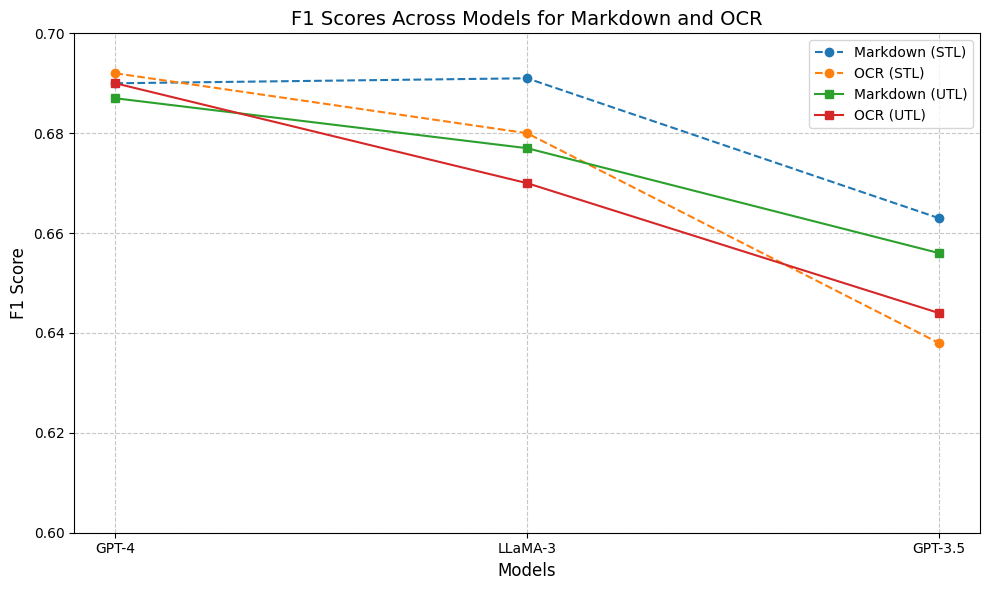

In [27]:
## LINE PLOT
import matplotlib.pyplot as plt

# Data
models = ['GPT-4', 'LLaMA-3', 'GPT-3.5']
stl_markdown = [0.690, 0.691, 0.663]
stl_ocr = [0.692, 0.680, 0.638]
utl_markdown = [0.687, 0.677, 0.656]
utl_ocr = [0.690, 0.670, 0.644]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models, stl_markdown, marker='o', label='Markdown (STL)', linestyle='--')
plt.plot(models, stl_ocr, marker='o', label='OCR (STL)', linestyle='--')
plt.plot(models, utl_markdown, marker='s', label='Markdown (UTL)', linestyle='-')
plt.plot(models, utl_ocr, marker='s', label='OCR (UTL)', linestyle='-')

# Customization
plt.title('F1 Scores Across Models for Markdown and OCR', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0.6, 0.7)  # Focused Y-axis range
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show
plt.tight_layout()
plt.show()


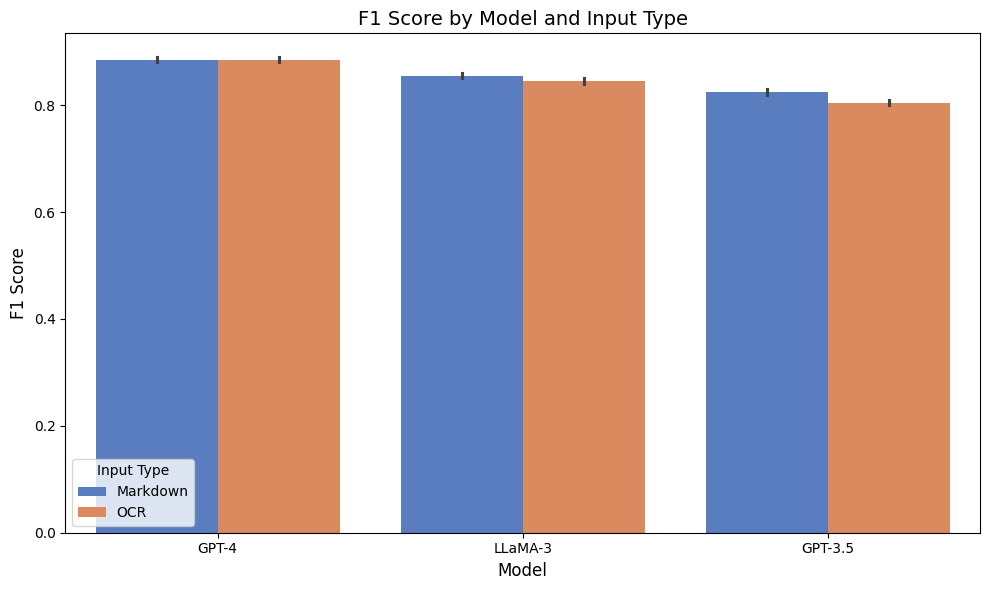

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['GPT-4', 'GPT-4', 'LLaMA-3', 'LLaMA-3', 'GPT-3.5', 'GPT-3.5'] * 2,
    'Level Type': (['STL', 'UTL'] * 3) * 2,
    'Input Type': ['Markdown'] * 6 + ['OCR'] * 6,
    'F1 Score': [0.88, 0.89, 0.85, 0.86, 0.82, 0.83, 0.88, 0.89, 0.84, 0.85, 0.8, 0.81]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Model',
    y='F1 Score',
    hue='Input Type',
    palette='muted'
)

# Customization
plt.title('F1 Score by Model and Input Type', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(title='Input Type')
plt.tight_layout()

# Show
plt.show()


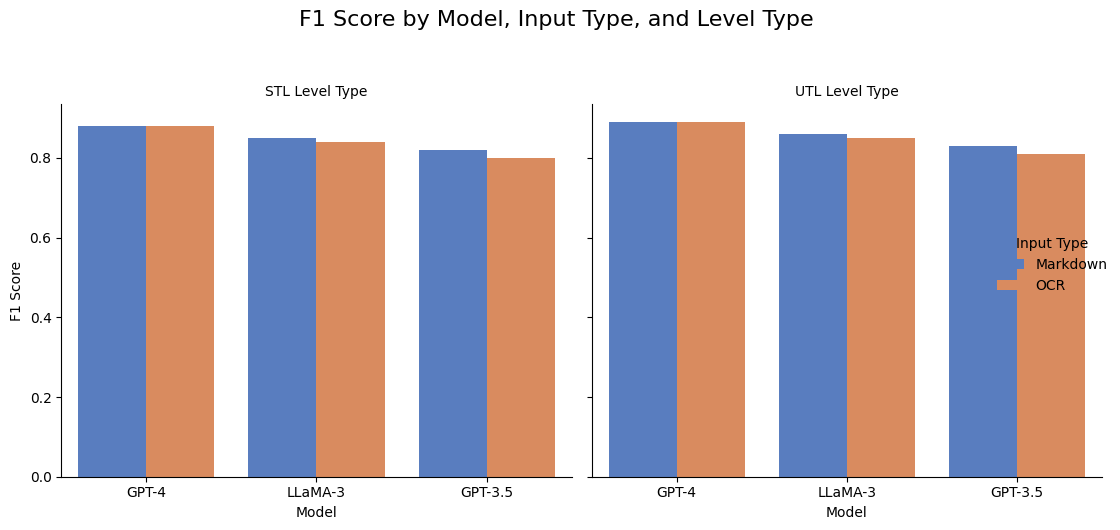

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Faceted bar plot
g = sns.catplot(
    data=df,
    x='Model',
    y='F1 Score',
    hue='Input Type',
    col='Level Type',
    kind='bar',
    palette='muted',
    height=5,
    aspect=1
)

# Customization
g.set_titles("{col_name} Level Type")
g.set_axis_labels("Model", "F1 Score")
g.legend.set_title("Input Type")
g.fig.suptitle('F1 Score by Model, Input Type, and Level Type', fontsize=16, y=1.05)

# Show
plt.tight_layout()
plt.show()


**Post-Processing is Highly Effective for Zero-Shot Learning:**
- In the absence of examples (example_num = 0), F1 scores improve the most with post-processing, likely because it compensates for weaker initial structure.
Model-Dependent Baseline Differences:

**Model-Dependent Baseline Differences:**
- GPT-4 consistently outperforms other models but does not exhibit disproportionately greater post-processing gains.
Chunk Size Matters:

**Chunk Size Matters:**
- Larger chunks (>1000 tokens) lead to better performance both before and after post-processing.

### Change Post-PRoccesing Part

In [7]:
import os
import json
import logging
import regex as re

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the folder containing the files
folder_path = 'VT2/gpt4_Markdown_Llama3_outputs/reg/responses'

# A set to store all unique entities
unique_entities = set()

# Process all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if not file_name.endswith('.jsonl'):
        continue  # Skip non-JSONL files
    
    logging.info(f"Processing file: {file_name}")
    
    # Read and process each line in the file
    with open(file_path, 'r', encoding='utf-8') as f:
        file_content = f.read()
    
    for line_no, line in enumerate(file_content.splitlines(), start=1):
        try:
            response = json.loads(line)
        except json.JSONDecodeError:
            logging.error(f"Invalid JSON format in file {file_name}, line {line_no}: {line}")
            continue
        
        try:
            # Extract message content
            message_content = response['response']['body']['choices'][0]['message']['content']
            message_content = re.sub(r'```json|```', '', message_content).strip()
            
            # Check if message_content is JSON or plain text
            if isinstance(message_content, str):
                try:
                    # Try to parse it as JSON
                    message_content = json.loads(message_content)
                except json.JSONDecodeError:
                    logging.warning(f"Message content in file {file_name}, line {line_no} is not JSON.")
                    continue
            
            # Handle different types of message_content
            if isinstance(message_content, dict):
                # Add all keys in the dictionary to the unique_entities set
                unique_entities.update(message_content.keys())
            elif isinstance(message_content, list):
                # If it's a list, check each item (assuming each is a dictionary)
                for item in message_content:
                    if isinstance(item, dict):
                        unique_entities.update(item.keys())
                    else:
                        logging.warning(f"Unexpected item type in list at file {file_name}, line {line_no}: {type(item)}")
            else:
                logging.warning(f"Unexpected message_content type at file {file_name}, line {line_no}: {type(message_content)}")
        
        except KeyError as e:
            logging.error(f"Missing key in file {file_name}, line {line_no}: {e}")

# Output the unique entities
logging.info(f"All unique entities collected: {unique_entities}")
print("Unique entities:", unique_entities)


FileNotFoundError: [Errno 2] No such file or directory: 'VT2/gpt4_Markdown_Llama3_outputs/reg/responses'

### Statsitics

In [90]:
from statistics import mean, stdev

In [64]:
ocr = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
markdown = [0.647, 0.657, 0.633, 0.633, 0.657, 0.662]

print("mean of OCR: ", mean(ocr))
print("stdev of OCR: ", stdev(ocr))
print("mean of markdown: ", mean(markdown))
print("stdev of markdown: ", stdev(markdown))

mean of OCR:  0.6506666666666667
stdev of OCR:  0.011860297916438141
mean of markdown:  0.6481666666666667
stdev of markdown:  0.012718752559377313


In [85]:
small = [0.562, 0.561, 0.602, 0.600, 0.615, 0.608]
medium = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
maxx = [0.645, 0.644, 0.674, 0.657, 0.647, 0.644]

print("mean of small: ", mean(small))
print("stdev of small: ", stdev(small))
print("mean of medium: ", mean(medium))
print("stdev of medium: ", stdev(medium))
print("mean of maxx: ", mean(maxx))
print("stdev of maxx: ", stdev(maxx))

mean of small:  0.5913333333333334
stdev of small:  0.02369528785785615
mean of medium:  0.6506666666666667
stdev of medium:  0.011860297916438141
mean of maxx:  0.6518333333333334
stdev of maxx:  0.011923366415013292


In [114]:
few_0 = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
few_1 = [0.586, 0.566, 0.608, 0.597, 0.599, 0.582]
few_3 = [0.593, 0.564, 0.602, 0.607, 0.606, 0.601]
few_5 = [0.548, 0.541, 0.595, 0.601, 0.603, 0.597]

cot_0 = [0.653, 0.650, 0.655, 0.659, 0.635, 0.644]
cot_1 = [0.602, 0.575, 0.615, 0.614, 0.603, 0.586]
cot_3 = [0.544, 0.548, 0.612, 0.611, 0.613, 0.601]
cot_5 = [0.533, 0.516, 0.605, 0.607, 0.610, 0.598]

print("mean of few_0: ", mean(few_0))
print("stdev of few_0: ", stdev(few_0))

print("mean of few_1: ", mean(few_1))
print("stdev of few_1: ", stdev(few_1))

print("mean of few_3: ", mean(few_3))
print("stdev of few_3: ", stdev(few_3))

print("mean of few_5: ", mean(few_5))
print("stdev of few_5: ", stdev(few_5))




mean of few_0:  0.6506666666666667
stdev of few_0:  0.011860297916438141
mean of few_1:  0.5896666666666667
stdev of few_1:  0.014895189380020216
mean of few_3:  0.5954999999999999
stdev of few_3:  0.016208022704821228
mean of few_5:  0.5808333333333333
stdev of few_5:  0.028371934489327035


In [115]:
print("mean of cot_0: ", mean(cot_0))
print("stdev of cot_0: ", stdev(cot_0))

print("mean of cot_1: ", mean(cot_1))
print("stdev of cot_1: ", stdev(cot_1))

print("mean of cot_3: ", mean(cot_3))
print("stdev of cot_3: ", stdev(cot_3))

print("mean of cot_5: ", mean(cot_5))
print("stdev of cot_5: ", stdev(cot_5))

mean of cot_0:  0.6493333333333333
stdev of cot_0:  0.008640987597877155
mean of cot_1:  0.5991666666666666
stdev of cot_1:  0.015816657885491078
mean of cot_3:  0.5881666666666667
stdev of cot_3:  0.03296917752487412
mean of cot_5:  0.5781666666666667
stdev of cot_5:  0.04210186060813305


In [120]:
initial_pred = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
mapped_pred = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
cleaned_pred = [0.737, 0.733, 0.749, 0.741, 0.724, 0.725]


print("mean of initial_pred: ", mean(initial_pred))
print("stdev of initial_pred: ", stdev(initial_pred))

print("mean of mapped_pred: ", mean(mapped_pred))
print("stdev of mapped_pred: ", stdev(mapped_pred))

print("mean of cleaned_pred: ", mean(cleaned_pred))
print("stdev of cleaned_pred: ", stdev(cleaned_pred))

mean of initial_pred:  0.6506666666666667
stdev of initial_pred:  0.011860297916438141
mean of mapped_pred:  0.6506666666666667
stdev of mapped_pred:  0.011860297916438141
mean of cleaned_pred:  0.7348333333333333
stdev of cleaned_pred:  0.009600347215943121


In [148]:
exact_match = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
substring_match = [0.683, 0.682, 0.690, 0.678, 0.661, 0.662]
fuzzy_match = [0.730, 0.726, 0.750, 0.744, 0.727, 0.723]


print("mean of exact_match: ", mean(exact_match))
print("stdev of exact_match: ", stdev(exact_match))

print("mean of substring_match: ", mean(substring_match))
print("stdev of substring_match: ", stdev(substring_match))

print("mean of fuzzy_match: ", mean(fuzzy_match))
print("stdev of fuzzy_match: ", stdev(fuzzy_match))

mean of exact_match:  0.6506666666666667
stdev of exact_match:  0.011860297916438141
mean of substring_match:  0.676
stdev of substring_match:  0.011882760622010343
mean of fuzzy_match:  0.7333333333333333
stdev of fuzzy_match:  0.01098483803552273


In [92]:
baseline = [0.650, 0.645, 0.670, 0.659, 0.640, 0.640]
chosen_medıum = [0.781, 0.777, 0.797, 0.791, 0.777, 0.776] 
brute_force = [0.778, 0.754, 0.797, 0.790, 0.843, 0.820]
chosen_max = [0.777, 0.776, 0.798, 0.788, 0.784, 0.776]


print("mean of baseline: ", mean(baseline))
print("stdev of baseline: ", stdev(baseline))

print("mean of chosen_medıum: ", mean(chosen_medıum))
print("stdev of chosen_medıum: ", stdev(chosen_medıum))

print("mean of chosen_max: ", mean(chosen_max))
print("stdev of chosen_max: ", stdev(chosen_max))

print("mean of brute_force: ", mean(brute_force))
print("stdev of brute_force: ", stdev(brute_force))

mean of baseline:  0.6506666666666667
stdev of baseline:  0.011860297916438141
mean of chosen_medıum:  0.7831666666666667
stdev of chosen_medıum:  0.008773064838850035
mean of chosen_max:  0.7831666666666667
stdev of chosen_max:  0.008773064838850035
mean of brute_force:  0.797
stdev of brute_force:  0.03131772660970139


#### Fınd overall best brtue-force confıg

In [149]:
import pandas as pd
import os

# Paths to the CSV files
csv_paths = [
    "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results2.csv"
]

# Performance columns
performance_columns = [
    "f1_initial_exact", 
    "f1_mapped_exact",
    "f1_cleaned_exact",
    "f1_initial_substring",
    "f1_mapped_substring",
    "f1_cleaned_substring", 
    "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy"
]

# Create a dataframe to store combined results
all_data = []

# Process each CSV file
for path in csv_paths:
    # Extract input type and model type from the path
    input_type = "Markdown" if "Markdown" in path else "OCR"
    model_type = os.path.basename(path).split("_")[0]  # Assuming model type is in file name
    
    # Read the CSV file
    df = pd.read_csv(path)
    df['input_type'] = input_type
    df['model_type'] = model_type
    
    # Append to the combined list
    all_data.append(df)

# Combine all data into a single dataframe
combined_df = pd.concat(all_data, ignore_index=True)
filtered_df = combined_df[combined_df['prompt_type'] != 'no_schema']

# Find the maximum performance
max_performance = None
for column in performance_columns:
    max_row = filtered_df.loc[filtered_df[column].idxmax()]
    if max_performance is None or max_row[column] > max_performance['value']:
        max_performance = {
            'experiment': max_row.to_dict(),
            'performance_column': column,
            'value': max_row[column]
        }

# Print the results
print("Experiment with the highest performance (excluding 'no_schema'):")
print(f"Performance Column: {max_performance['performance_column']}")
print(f"Value: {max_performance['value']}")
print(f"Details: {max_performance['experiment']}")

Experiment with the highest performance (excluding 'no_schema'):
Performance Column: f1_cleaned_fuzzy
Value: 0.8439073514602212
Details: {'experiment_id': 66, 'model_IE': 'llama3-70b-8192', 'model_Markdown_Generation': 'gpt-4o', 'processing_time': 20.14, 'dataset': 'vrdu', 'chunk_size': 2996, 'prompt_type': 'chain_of_thought', 'example_num': 5.0, 'level_type': 'STL', 'transformation_method': 'layout-aware', 'cleaned_gt': "{'file_date': ['york za 1983 day of april'], 'foreign_principle_name': '', 'registrant_name': ['Bermuda Department Of Tourism'], 'registration_num': ['430'], 'signer_name': ['(ronald N. Bassett )'], 'signer_title': ['general manager, north america']}", 'match_results_initial_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_mapped_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_cleaned_exact': "{'file_date': 0, 'regist

#### Fınd best brute force confıg for gpt3

In [126]:
import pandas as pd
import os

# Paths to the CSV files
csv_paths = [
    "VT2/gpt4_Markdown_gpt3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt3.5_outputs/reg/edited_experiments/combined_experiment_results2.csv"
]

# Performance columns
performance_columns = [
    "f1_initial_exact", 
    "f1_mapped_exact",
    "f1_cleaned_exact",
    "f1_initial_substring",
    "f1_mapped_substring",
    "f1_cleaned_substring", 
    "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy"
]

# Create a dataframe to store combined results
all_data = []

# Process each CSV file
for path in csv_paths:
    # Extract input type and model type from the path
    input_type = "Markdown" if "Markdown" in path else "OCR"
    model_type = os.path.basename(path).split("_")[0]  # Assuming model type is in file name
    
    # Read the CSV file
    df = pd.read_csv(path)
    df['input_type'] = input_type
    df['model_type'] = model_type
    
    # Append to the combined list
    all_data.append(df)

# Combine all data into a single dataframe
combined_df = pd.concat(all_data, ignore_index=True)
filtered_df = combined_df[combined_df['prompt_type'] != 'no_schema']

# Find the maximum and minimum performance
max_performance = None
min_performance = None

for column in performance_columns:
    max_row = filtered_df.loc[filtered_df[column].idxmax()]
    min_row = filtered_df.loc[filtered_df[column].idxmin()]
    
    if max_performance is None or max_row[column] > max_performance['value']:
        max_performance = {
            'experiment': max_row.to_dict(),
            'performance_column': column,
            'value': max_row[column]
        }
    
    if min_performance is None or min_row[column] < min_performance['value']:
        min_performance = {
            'experiment': min_row.to_dict(),
            'performance_column': column,
            'value': min_row[column]
        }

# Print the results
print("Experiment with the highest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {max_performance['performance_column']}")
print(f"Value: {max_performance['value']}")
print(f"Details: {max_performance['experiment']}")

print("\nExperiment with the lowest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {min_performance['performance_column']}")
print(f"Value: {min_performance['value']}")
print(f"Details: {min_performance['experiment']}")


Experiment with the highest performance (excluding 'no_schema') for gpt3:
Performance Column: f1_cleaned_fuzzy
Value: 0.7895287958115186
Details: {'experiment_id': 77, 'model_name': 'gpt-3.5-turbo', 'chunk_size': 1421, 'prompt_type': 'chain_of_thought', 'example_num': 0.0, 'transformation_method': 'naive', 'cleaned_gt': "{'file_date': ['york za 1983 day of april'], 'foreign_principle_name': '', 'registrant_name': ['Bermuda Department Of Tourism'], 'registration_num': ['430'], 'signer_name': ['(ronald N. Bassett )'], 'signer_title': ['general manager, north america']}", 'match_results_initial_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_mapped_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_cleaned_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_initial_sub

#### Fınd best brute force confıg for gpt4

In [127]:
import pandas as pd
import os

# Paths to the CSV files
csv_paths = [
    "VT2/gpt4_Markdown_gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "gpt4_outputs/reg/edited_experiments/combined_experiment_results2.csv"
]

# Performance columns
performance_columns = [
    "f1_initial_exact", 
    "f1_mapped_exact",
    "f1_cleaned_exact",
    "f1_initial_substring",
    "f1_mapped_substring",
    "f1_cleaned_substring", 
    "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy"
]

# Create a dataframe to store combined results
all_data = []

# Process each CSV file
for path in csv_paths:
    # Extract input type and model type from the path
    input_type = "Markdown" if "Markdown" in path else "OCR"
    model_type = os.path.basename(path).split("_")[0]  # Assuming model type is in file name
    
    # Read the CSV file
    df = pd.read_csv(path)
    df['input_type'] = input_type
    df['model_type'] = model_type
    
    # Append to the combined list
    all_data.append(df)

# Combine all data into a single dataframe
combined_df = pd.concat(all_data, ignore_index=True)
filtered_df = combined_df[combined_df['prompt_type'] != 'no_schema']

# Find the maximum and minimum performance
max_performance = None
min_performance = None

for column in performance_columns:
    max_row = filtered_df.loc[filtered_df[column].idxmax()]
    min_row = filtered_df.loc[filtered_df[column].idxmin()]
    
    if max_performance is None or max_row[column] > max_performance['value']:
        max_performance = {
            'experiment': max_row.to_dict(),
            'performance_column': column,
            'value': max_row[column]
        }
    
    if min_performance is None or min_row[column] < min_performance['value']:
        min_performance = {
            'experiment': min_row.to_dict(),
            'performance_column': column,
            'value': min_row[column]
        }

# Print the results
print("Experiment with the highest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {max_performance['performance_column']}")
print(f"Value: {max_performance['value']}")
print(f"Details: {max_performance['experiment']}")

print("\nExperiment with the lowest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {min_performance['performance_column']}")
print(f"Value: {min_performance['value']}")
print(f"Details: {min_performance['experiment']}")


Experiment with the highest performance (excluding 'no_schema') for gpt3:
Performance Column: f1_cleaned_fuzzy
Value: 0.8070175438596487
Details: {'experiment_id': 67, 'model_name': 'gpt-4o', 'chunk_size': 2996, 'prompt_type': 'chain_of_thought', 'example_num': 5.0, 'transformation_method': 'naive', 'cleaned_gt': nan, 'match_results_initial_exact': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_mapped_exact': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_cleaned_exact': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_initial_substring': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_mapped_substring': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_cleaned_substring': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_initial_fuzzy': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_mapped_fuzzy': "{'registrant_name': 0, 'registration_num': 1}", 'match_results_cleaned_fuzzy': 

#### Fınd best brute force confıg for llama

In [128]:
import pandas as pd
import os

# Paths to the CSV files
csv_paths = [
    "VT2/gpt4_Markdown_Llama3_outputs/reg/edited_experiments/combined_experiment_results2.csv",
    "llama3_70b_outputs/reg/edited_experiments/combined_experiment_results2.csv"
]

# Performance columns
performance_columns = [
    "f1_initial_exact", 
    "f1_mapped_exact",
    "f1_cleaned_exact",
    "f1_initial_substring",
    "f1_mapped_substring",
    "f1_cleaned_substring", 
    "f1_initial_fuzzy", 
    "f1_mapped_fuzzy", 
    "f1_cleaned_fuzzy"
]

# Create a dataframe to store combined results
all_data = []

# Process each CSV file
for path in csv_paths:
    # Extract input type and model type from the path
    input_type = "Markdown" if "Markdown" in path else "OCR"
    model_type = os.path.basename(path).split("_")[0]  # Assuming model type is in file name
    
    # Read the CSV file
    df = pd.read_csv(path)
    df['input_type'] = input_type
    df['model_type'] = model_type
    
    # Append to the combined list
    all_data.append(df)

# Combine all data into a single dataframe
combined_df = pd.concat(all_data, ignore_index=True)
filtered_df = combined_df[combined_df['prompt_type'] != 'no_schema']

# Find the maximum and minimum performance
max_performance = None
min_performance = None

for column in performance_columns:
    max_row = filtered_df.loc[filtered_df[column].idxmax()]
    min_row = filtered_df.loc[filtered_df[column].idxmin()]
    
    if max_performance is None or max_row[column] > max_performance['value']:
        max_performance = {
            'experiment': max_row.to_dict(),
            'performance_column': column,
            'value': max_row[column]
        }
    
    if min_performance is None or min_row[column] < min_performance['value']:
        min_performance = {
            'experiment': min_row.to_dict(),
            'performance_column': column,
            'value': min_row[column]
        }

# Print the results
print("Experiment with the highest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {max_performance['performance_column']}")
print(f"Value: {max_performance['value']}")
print(f"Details: {max_performance['experiment']}")

print("\nExperiment with the lowest performance (excluding 'no_schema') for gpt3:")
print(f"Performance Column: {min_performance['performance_column']}")
print(f"Value: {min_performance['value']}")
print(f"Details: {min_performance['experiment']}")


Experiment with the highest performance (excluding 'no_schema') for gpt3:
Performance Column: f1_cleaned_fuzzy
Value: 0.8439073514602212
Details: {'experiment_id': 66, 'model_IE': 'llama3-70b-8192', 'model_Markdown_Generation': 'gpt-4o', 'processing_time': 20.14, 'dataset': 'vrdu', 'chunk_size': 2996, 'prompt_type': 'chain_of_thought', 'example_num': 5.0, 'level_type': 'STL', 'transformation_method': 'layout-aware', 'cleaned_gt': "{'file_date': ['york za 1983 day of april'], 'foreign_principle_name': '', 'registrant_name': ['Bermuda Department Of Tourism'], 'registration_num': ['430'], 'signer_name': ['(ronald N. Bassett )'], 'signer_title': ['general manager, north america']}", 'match_results_initial_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_mapped_exact': "{'file_date': 0, 'registrant_name': 1, 'registration_num': 1, 'signer_name': 0, 'signer_title': 1}", 'match_results_cleaned_exact': "{'file_date': 0

In [125]:
import pandas as pd

def generate_results_table():
    # Define the data
    data = {
        "Model": ["Llama3", "GPT-3", "GPT-4"],
        "Input Type": ["Markdown", "Markdown", "OCR"],
        "Chunk Size": ["Max", "Medium", "Max"],
        "Prompt Type": ["CoT", "CoT", "CoT"],
        "Example Num": [5, 0, 5],
        "Level Type": ["STL", "STL", "STL"],
        "F1 Score": [0.843, 0.789, 0.807]
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Display as Pandas styled table
    from IPython.display import display
    display(df.style.set_table_styles([
        {"selector": "thead th", "props": "background-color: #f4f4f4; text-align: center;"},
        {"selector": "tbody td", "props": "text-align: center;"}
    ]))

if __name__ == "__main__":
    generate_results_table()


,Model,Input Type,Chunk Size,Prompt Type,Example Num,Level Type,F1 Score
0,Llama3,Markdown,Max,CoT,5,STL,0.843000
1,GPT-3,Markdown,Medium,CoT,0,STL,0.789000
2,GPT-4,OCR,Max,CoT,5,STL,0.807000


#### Fınd OFAD tehcnıque for each model seperately

In [124]:
import pandas as pd

def generate_results_table():
    # Define the data
    data = {
        "Model": ["Llama3", "GPT-3", "GPT-4"],
        "Input Type": ["Markdown", "Markdown", "OCR"],
        "Chunk Size": ["Max", "Medium", "Max"],
        "Prompt Type": ["Few-shot", "CoT", "Few-shot"],
        "Example Num": [0, 0, 0],
        "F1 Score": [0.793, 0.786, 0.793]
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Display as Pandas styled table
    from IPython.display import display
    display(df.style.set_table_styles([
        {"selector": "thead th", "props": "background-color: #f4f4f4; text-align: center;"},
        {"selector": "tbody td", "props": "text-align: center;"}
    ]))

if __name__ == "__main__":
    generate_results_table()


,Model,Input Type,Chunk Size,Prompt Type,Example Num,F1 Score
0,Llama3,Markdown,Max,Few-shot,0,0.793000
1,GPT-3,Markdown,Medium,CoT,0,0.786000
2,GPT-4,OCR,Max,Few-shot,0,0.793000


### Checkout if Fuzzy and Substring works well

In [38]:
import os
import pandas as pd
import ast

# Directories containing the CSV files
directories = [
    "gpt3.5_outputs/reg/experiments2",
    "gpt4_outputs/reg/experiments2",
    "llama3_70b_outputs/reg/experiments2",
]

# Function to get all CSV files in the directories
def get_all_csv_files(directories):
    csv_files = []
    for directory in directories:
        for root, _, files in os.walk(directory):
            # Skip .ipynb_checkpoints directories
            if ".ipynb_checkpoints" in root:
                continue
            for file in files:
                if file.endswith(".csv"):
                    csv_files.append(os.path.join(root, file))
    return csv_files

# Function to process each row and extract required information
def process_row(row, path):
    result = []
    # Loop through match types (initial, mapped, cleaned)
    for match_type in ["initial", "mapped", "cleaned"]:
        # Extract exact, substring, and fuzzy values as dictionaries
        exact = ast.literal_eval(row[f"match_results_{match_type}_exact"])
        substring = ast.literal_eval(row[f"match_results_{match_type}_substring"])
        fuzzy = ast.literal_eval(row[f"match_results_{match_type}_fuzzy"])
        
        # Check each entity in the exact match results
        for key, exact_value in exact.items():
            if exact_value == 1:  # If the exact match value is 0
                # Check if the same key exists with value 1 in substring or fuzzy matches
                if fuzzy.get(key, 0):
                    # Retrieve values from ground truth and predictions
                    ground_truth_value = ast.literal_eval(row["ground_truth"]).get(key, None)
                    prediction_value = ast.literal_eval(row["predictions"]).get(key, None)
                    cleaned_gt_value = ast.literal_eval(row["cleaned_gt"]).get(key, None)
                    mapped_pred_value = ast.literal_eval(row["mapped_pred"]).get(key, None)
                    cleaned_pred_value = ast.literal_eval(row["cleaned_pred"]).get(key, None)
                    
                    # Append all details to the result list
                    result.append({
                        "path": path,
                        "experiment_id": path.split("/")[-1].split("_")[1],
                        "row_index": row.name,
                        "pred_type": match_type,
                        "entity": key,
                        "exact_match": exact_value,
                        "substring_match": substring.get(key, 0),
                        "fuzzy_match": fuzzy.get(key, 0),
                        "ground_truth": ground_truth_value,
                        "prediction": prediction_value,
                        "cleaned_gt": cleaned_gt_value,
                        "mapped_pred": mapped_pred_value,
                        "cleaned_pred": cleaned_pred_value
                    })

    return result

# Get all CSV files
csv_files = get_all_csv_files(directories)

# Process each CSV file and collect results
all_results = []
for path in csv_files:
    print(f"Processing: {path}")
    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(path)

        # Process each row in the DataFrame
        df.apply(lambda row: all_results.extend(process_row(row, path)), axis=1)
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Convert all results to a DataFrame
output_df = pd.DataFrame(all_results)

# Save the combined results to a CSV file
output_file = "ones_combined_processed_mismatches_fuzzy.csv"
output_df.to_csv(output_file, index=False)

print(f"Processing complete. Results saved to {output_file}")


Processing: gpt3.5_outputs/reg/experiments2/experiment_56_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_67_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_42_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_32_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_40_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_49_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_19_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_39_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_17_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_88_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_104_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_31_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_8_results.csv
Processing: gpt3.5_outputs/reg/experiments2/experiment_91_results.csv
Processing: gpt3.5_o

In [21]:
df = pd.read_csv("ones_combined_processed_mismatches_fuzzy.csv")
filtered_df = df[df["pred_type"] == "cleaned"]

# Save the combined results to a CSV file
output_file = "ones_filtered_combined_processed_mismatches_fuzzy_cleaned.csv"
filtered_df.to_csv(output_file, index=False)

#### Get Samples

In [22]:
import pandas as pd

# Load the data
df = pd.read_csv("ones_filtered_combined_processed_mismatches_fuzzy_cleaned.csv")

# Filter conditions
condition1 = df['path'].str.startswith("VT2/") & df['path'].str.endswith("_98_results.csv")
condition2 = ~df['path'].str.startswith("VT2/") & df['path'].str.endswith("_28_results.csv")

# Combine the filtered rows
filtered_df = df[condition1 | condition2]  # Use '|' for logical OR between conditions

# Save to a new CSV
output_file = "ones_filtered_experiment_results_fuzzy_cleaned.csv"
filtered_df.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")


Filtered data saved to ones_filtered_experiment_results_fuzzy_cleaned.csv


#### Get all in one

In [55]:
import os
import pandas as pd
import ast

# Directories containing the CSV files
directories = [
    "gpt3.5_outputs/reg/experiments2",
    "gpt4_outputs/reg/experiments2",
    "llama3_70b_outputs/reg/experiments2",
]

# Specific file to process
filename = "experiment_28_results.csv"

# Function to get all CSV files in the directories
def get_csv_files(directories, filename):
    csv_files = []
    for directory in directories:
        file_path = os.path.join(directory, filename)
        if os.path.exists(file_path):
            csv_files.append(file_path)
    return csv_files

# Function to process each row and extract required information
def process_row(row, path):
    result = []
    
    match_type = "cleaned"  # Only process cleaned match type

    # Extract exact, substring, and fuzzy values as dictionaries
    try:
        exact = ast.literal_eval(row[f"match_results_{match_type}_exact"])
        substring = ast.literal_eval(row[f"match_results_{match_type}_substring"])
        fuzzy = ast.literal_eval(row[f"match_results_{match_type}_fuzzy"])
    except Exception as e:
        print(f"Error parsing match results in {path}, row {row.name}: {e}")
        return []

    # Process all entities
    for key in exact.keys():
        ground_truth_value = ast.literal_eval(row["ground_truth"]).get(key, None)
        prediction_value = ast.literal_eval(row["predictions"]).get(key, None)
        cleaned_gt_value = ast.literal_eval(row["cleaned_gt"]).get(key, None)
        mapped_pred_value = ast.literal_eval(row["mapped_pred"]).get(key, None)
        cleaned_pred_value = ast.literal_eval(row["cleaned_pred"]).get(key, None)

        # Append all details to the result list
        result.append({
            "path": path,
            "row_index": row.name,
            "entity": key,
            "exact_match": exact.get(key, 0),
            "substring_match": substring.get(key, 0),
            "fuzzy_match": fuzzy.get(key, 0),
            "cleaned_gt": cleaned_gt_value,
            "cleaned_pred": cleaned_pred_value
        })

    return result

# Get the list of experiment_28_results.csv files
csv_files = get_csv_files(directories, filename)

# Process each CSV file and collect results
all_results = []
for path in csv_files:
    print(f"Processing: {path}")
    try:
        # Load the CSV into a DataFrame
        df = pd.read_csv(path)

        # Process each row in the DataFrame
        df.apply(lambda row: all_results.extend(process_row(row, path)), axis=1)
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Convert all results to a DataFrame
output_df = pd.DataFrame(all_results)

# Save the combined results to a CSV file
output_file = "exp_28_combined_processed_all.csv"
output_df.to_csv(output_file, index=False)

print(f"Processing complete. Results saved to {output_file}")


Processing: gpt3.5_outputs/reg/experiments2/experiment_28_results.csv
Processing: gpt4_outputs/reg/experiments2/experiment_28_results.csv
Processing: llama3_70b_outputs/reg/experiments2/experiment_28_results.csv
Processing complete. Results saved to exp_28_combined_processed_all.csv


In [58]:
((output_df["exact_match"] == 1) & (output_df["substring_match"] == 0)).sum()

0

#### Check OCR/GT/LLM halucination Errors

In [11]:
import gzip
import json

# Path to the dataset.jsonl.gz file
dataset_path = "VT2/vrdu/registration-form/main/dataset.jsonl.gz"

# Function to extract and print the desired parts of the JSON structure
def inspect_json_structure_for_filename(dataset_path, target_filename):
    with gzip.open(dataset_path, 'rt', encoding='utf-8') as file:
        for line in file:
            entry = json.loads(line)
            if entry['filename'] == target_filename:
                print(f"Data for: {target_filename}")
                
                # Print the OCR text part
                if 'ocr' in entry and 'text' in entry['ocr']:
                    print("\nOCR Text:")
                    print(entry['ocr']['text'])
                else:
                    print("\nOCR Text: Not found")
                
                # Print the annotations part
                if 'annotations' in entry:
                    print("\nAnnotations:")
                    print(json.dumps(entry['annotations'], indent=2))
                else:
                    print("\nAnnotations: Not found")
                
                return
        print(f"Filename '{target_filename}' not found in the dataset.")

# Specify the filename to inspect
filename_to_inspect = "20170112_Podesta Group, Inc._Thompson, Dana_Short-Form.pdf"

# Inspect the JSON structure for the specified filename
inspect_json_structure_for_filename(dataset_path, filename_to_inspect)


Data for: 20170112_Podesta Group, Inc._Thompson, Dana_Short-Form.pdf

OCR Text:
Received by NSD/FARA Registration Unit 01/12/2017 10:47:15 AM
U.S. Department of Justice
Washington, DC 20530
OMB No. 1124-0005; Expires April 30, 2017
Short Form Registration Statement
Pursuant to the Foreign Agents Registration Act of
1938, as amended
INSTRUCTIONS. Each partner, officer, director, associate, employee, and agent of a registrant is required to file a short form registration statement
unless he engages in no activities in furtherance of the interests of the registrant's foreign principal or unless the services he renders to the registrant
are in a secretarial, clerical, or in a related or similar capacity. Compliance is accomplished by filing an electronic short form registration statement
at http://www.fara.gov.
Privacy Act Statement. The filing of this document is required for the Foreign Agents Registration Act of 1938, as amended, 22 U.S.C. § 611 et seq.,
for the purposes of registration

#### F1/precision/recall for Fuzzy/Exact/Substring (By combının all ın one)

In [5]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Load the Excel file
file_path = "exp_28_combined_processed_all.xlsx"
df = pd.read_excel(file_path)

# Define evaluation techniques
evaluation_methods = ["exact_match", "fuzzy_match", "substring_match"]
ground_truth_col = "label_custom"  # Ground truth column

# Convert all relevant columns to integers (binary classification: 0 or 1)
df[ground_truth_col] = df[ground_truth_col].astype(int)
for method in evaluation_methods:
    df[method] = df[method].astype(int)

# Store results
metrics_results = {}

# Compute metrics for each evaluation method
for method in evaluation_methods:
    precision, recall, f1, _ = precision_recall_fscore_support(
        df[ground_truth_col], df[method], average="binary"
    )
    metrics_results[method] = {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Convert results to DataFrame and display
metrics_df = pd.DataFrame.from_dict(metrics_results, orient="index")
print(metrics_df)


                 Precision    Recall  F1-Score
exact_match       1.000000  0.615249  0.761801
fuzzy_match       0.999104  0.653959  0.790500
substring_match   1.000000  0.636950  0.778216


#### By substrıng and Fuzzy seperately

In [110]:
import pandas as pd

# Load the Excel file
file_path = "filtered_experiment_results_substring_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# Load the substring matching sheet
df = pd.read_excel(xls, sheet_name='filtered_experiment_results_sub')

# Function to calculate precision, recall, and F1-score
def calculate_metrics(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

In [111]:
# Overall metrics for exact match
tp_exact = ((df["exact_match"] == 1) & (df["label_substring"] == 1)).sum()
fp_exact = ((df["exact_match"] == 1) & (df["label_substring"] == 0)).sum()
fn_exact = ((df["exact_match"] == 0) & (df["label_substring"] == 1)).sum()

precision_exact, recall_exact, f1_exact = calculate_metrics(tp_exact, fp_exact, fn_exact)

# Overall metrics for substring match
tp_substring = ((df["substring_match"] == 1) & (df["label_substring"] == 1)).sum()
fp_substring = ((df["substring_match"] == 1) & (df["label_substring"] == 0)).sum()
fn_substring = ((df["substring_match"] == 0) & (df["label_substring"] == 1)).sum()

precision_substring, recall_substring, f1_substring = calculate_metrics(tp_substring, fp_substring, fn_substring)

# Metrics for rows where exact_match == 0
df_filtered = df[df["exact_match"] == 0]

tp_exact_filtered = ((df_filtered["exact_match"] == 1) & (df_filtered["label_substring"] == 1)).sum()
fp_exact_filtered = ((df_filtered["exact_match"] == 1) & (df_filtered["label_substring"] == 0)).sum()
fn_exact_filtered = ((df_filtered["exact_match"] == 0) & (df_filtered["label_substring"] == 1)).sum()

precision_exact_filtered, recall_exact_filtered, f1_exact_filtered = calculate_metrics(tp_exact_filtered, fp_exact_filtered, fn_exact_filtered)

tp_substring_filtered = ((df_filtered["substring_match"] == 1) & (df_filtered["label_substring"] == 1)).sum()
fp_substring_filtered = ((df_filtered["substring_match"] == 1) & (df_filtered["label_substring"] == 0)).sum()
fn_substring_filtered = ((df_filtered["substring_match"] == 0) & (df_filtered["label_substring"] == 1)).sum()

precision_substring_filtered, recall_substring_filtered, f1_substring_filtered = calculate_metrics(tp_substring_filtered, fp_substring_filtered, fn_substring_filtered)

# Display results
print("Overall Exact Match Metrics:")
print(f"Precision: {precision_exact:.4f}, Recall: {recall_exact:.4f}, F1-score: {f1_exact:.4f}")

print("\nOverall Substring Match Metrics:")
print(f"Precision: {precision_substring:.4f}, Recall: {recall_substring:.4f}, F1-score: {f1_substring:.4f}")

print("\nExact Match Metrics for Rows where exact_match == 0:")
print(f"Precision: {precision_exact_filtered:.4f}, Recall: {recall_exact_filtered:.4f}, F1-score: {f1_exact_filtered:.4f}")

print("\nSubstring Match Metrics for Rows where exact_match == 0:")
print(f"Precision: {precision_substring_filtered:.4f}, Recall: {recall_substring_filtered:.4f}, F1-score: {f1_substring_filtered:.4f}")


Overall Exact Match Metrics:
Precision: 1.0000, Recall: 0.9659, F1-score: 0.9827

Overall Substring Match Metrics:
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Exact Match Metrics for Rows where exact_match == 0:
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Substring Match Metrics for Rows where exact_match == 0:
Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics using sklearn
precision_exact = precision_score(df["label_substring"], df["exact_match"])
recall_exact = recall_score(df["label_substring"], df["exact_match"])
f1_exact = f1_score(df["label_substring"], df["exact_match"])

precision_substring = precision_score(df["label_substring"], df["substring_match"])
recall_substring = recall_score(df["label_substring"], df["substring_match"])
f1_substring = f1_score(df["label_substring"], df["substring_match"])

# Print the results
print("---EXACT")
print(f"Precision: {precision_exact:.4f}")
print(f"Recall: {recall_exact:.4f}")
print(f"F1 Score: {f1_exact:.4f}")

print("\n---SUBSTR")
print(f"Precision: {precision_substring:.4f}")
print(f"Recall: {recall_substring:.4f}")
print(f"F1 Score: {f1_substring:.4f}")

df_filtered = df[df["exact_match"] == 0]

# Calculate metrics using sklearn
precision_exact = precision_score(df_filtered["label_substring"], df_filtered["exact_match"])
recall_exact = recall_score(df_filtered["label_substring"], df_filtered["exact_match"])
f1_exact = f1_score(df_filtered["label_substring"], df_filtered["exact_match"])

precision_substring = precision_score(df_filtered["label_substring"], df_filtered["substring_match"])
recall_substring = recall_score(df_filtered["label_substring"], df_filtered["substring_match"])
f1_substring = f1_score(df_filtered["label_substring"], df_filtered["substring_match"])

# Print the results
print("\n---EXACT(0)")
print(f"Precision: {precision_exact:.4f}")
print(f"Recall: {recall_exact:.4f}")
print(f"F1 Score: {f1_exact:.4f}")

print("\n---SUBSTR(0)")
print(f"Precision: {precision_substring:.4f}")
print(f"Recall: {recall_substring:.4f}")
print(f"F1 Score: {f1_substring:.4f}")

---EXACT
Precision: 1.0000
Recall: 0.9659
F1 Score: 0.9827

---SUBSTR
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

---EXACT(0)
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

---SUBSTR(0)
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


/home/gaye/miniconda3/envs/vt2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
file_path = "filtered_experiment_results_substring_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# Load the fuzzy matching sheet
df_fuzzy = pd.read_excel(xls, sheet_name='fuzzy')# Overall metrics for exact match in fuzzy sheet

tp_exact_fuzzy = ((df_fuzzy["exact_match"] == 1) & (df_fuzzy["label_fuzzy"] == 1)).sum()
fp_exact_fuzzy = ((df_fuzzy["exact_match"] == 1) & (df_fuzzy["label_fuzzy"] == 0)).sum()
fn_exact_fuzzy = ((df_fuzzy["exact_match"] == 0) & (df_fuzzy["label_fuzzy"] == 1)).sum()

precision_exact_fuzzy, recall_exact_fuzzy, f1_exact_fuzzy = calculate_metrics(tp_exact_fuzzy, fp_exact_fuzzy, fn_exact_fuzzy)

# Overall metrics for fuzzy match
tp_fuzzy = ((df_fuzzy["fuzzy_match"] == 1) & (df_fuzzy["label_fuzzy"] == 1)).sum()
fp_fuzzy = ((df_fuzzy["fuzzy_match"] == 1) & (df_fuzzy["label_fuzzy"] == 0)).sum()
fn_fuzzy = ((df_fuzzy["fuzzy_match"] == 0) & (df_fuzzy["label_fuzzy"] == 1)).sum()

precision_fuzzy, recall_fuzzy, f1_fuzzy = calculate_metrics(tp_fuzzy, fp_fuzzy, fn_fuzzy)

# Metrics for rows where exact_match == 0 in fuzzy sheet
df_filtered_fuzzy = df_fuzzy[df_fuzzy["exact_match"] == 0]

tp_exact_filtered_fuzzy = ((df_filtered_fuzzy["exact_match"] == 1) & (df_filtered_fuzzy["label_fuzzy"] == 1)).sum()
fp_exact_filtered_fuzzy = ((df_filtered_fuzzy["exact_match"] == 1) & (df_filtered_fuzzy["label_fuzzy"] == 0)).sum()
fn_exact_filtered_fuzzy = ((df_filtered_fuzzy["exact_match"] == 0) & (df_filtered_fuzzy["label_fuzzy"] == 1)).sum()

precision_exact_filtered_fuzzy, recall_exact_filtered_fuzzy, f1_exact_filtered_fuzzy = calculate_metrics(tp_exact_filtered_fuzzy, fp_exact_filtered_fuzzy, fn_exact_filtered_fuzzy)

tp_fuzzy_filtered = ((df_filtered_fuzzy["fuzzy_match"] == 1) & (df_filtered_fuzzy["label_fuzzy"] == 1)).sum()
fp_fuzzy_filtered = ((df_filtered_fuzzy["fuzzy_match"] == 1) & (df_filtered_fuzzy["label_fuzzy"] == 0)).sum()
fn_fuzzy_filtered = ((df_filtered_fuzzy["fuzzy_match"] == 0) & (df_filtered_fuzzy["label_fuzzy"] == 1)).sum()


precision_fuzzy_filtered, recall_fuzzy_filtered, f1_fuzzy_filtered = calculate_metrics(tp_fuzzy_filtered, fp_fuzzy_filtered, fn_fuzzy_filtered)

# Display results
print("Overall Exact Match Metrics:")
print(f"Precision: {precision_exact_fuzzy:.4f}, Recall: {recall_exact_fuzzy:.4f}, F1-score: {f1_exact_fuzzy:.4f}")

print("\nOverall Fuzzy Match Metrics:")
print(f"Precision: {precision_fuzzy:.4f}, Recall: {recall_fuzzy:.4f}, F1-score: {f1_fuzzy:.4f}")

print("\nExact Match Metrics for Rows where exact_match == 0:")
print(f"Precision: {precision_exact_filtered_fuzzy:.4f}, Recall: {recall_exact_filtered_fuzzy:.4f}, F1-score: {f1_exact_filtered_fuzzy:.4f}")

print("\nFuzzy Match Metrics for Rows where exact_match == 0:")
print(f"Precision: {precision_fuzzy_filtered:.4f}, Recall: {recall_fuzzy_filtered:.4f}, F1-score: {f1_fuzzy_filtered:.4f}")


Overall Exact Match Metrics:
Precision: 1.0000, Recall: 0.9417, F1-score: 0.9699

Overall Fuzzy Match Metrics:
Precision: 0.9991, Recall: 1.0000, F1-score: 0.9996

Exact Match Metrics for Rows where exact_match == 0:
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Fuzzy Match Metrics for Rows where exact_match == 0:
Precision: 0.9848, Recall: 1.0000, F1-score: 0.9924


In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score
file_path = "filtered_experiment_results_substring_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# Load the fuzzy matching sheet
df = pd.read_excel(xls, sheet_name='fuzzy')# Overall metrics for exact match in fuzzy sheet

# Calculate metrics using sklearn
precision_exact = precision_score(df["label_fuzzy"], df["exact_match"])
recall_exact = recall_score(df["label_fuzzy"], df["exact_match"])
f1_exact = f1_score(df["label_fuzzy"], df["exact_match"])

precision_substring = precision_score(df["label_fuzzy"], df["fuzzy_match"])
recall_substring = recall_score(df["label_fuzzy"], df["fuzzy_match"])
f1_substring = f1_score(df["label_fuzzy"], df["fuzzy_match"])

# Print the results
print("---EXACT")
print(f"Precision: {precision_exact:.4f}")
print(f"Recall: {recall_exact:.4f}")
print(f"F1 Score: {f1_exact:.4f}")

print("\n---Fuzzy")
print(f"Precision: {precision_substring:.4f}")
print(f"Recall: {recall_substring:.4f}")
print(f"F1 Score: {f1_substring:.4f}")

df_filtered = df[df["exact_match"] == 0]

# Calculate metrics using sklearn
precision_exact = precision_score(df_filtered["label_fuzzy"], df_filtered["exact_match"])
recall_exact = recall_score(df_filtered["label_fuzzy"], df_filtered["exact_match"])
f1_exact = f1_score(df_filtered["label_fuzzy"], df_filtered["exact_match"])

precision_substring = precision_score(df_filtered["label_fuzzy"], df_filtered["fuzzy_match"])
recall_substring = recall_score(df_filtered["label_fuzzy"], df_filtered["fuzzy_match"])
f1_substring = f1_score(df_filtered["label_fuzzy"], df_filtered["fuzzy_match"])

# Print the results
print("\n---EXACT(0)")
print(f"Precision: {precision_exact:.4f}")
print(f"Recall: {recall_exact:.4f}")
print(f"F1 Score: {f1_exact:.4f}")

print("\n---Fuzzy(0)")
print(f"Precision: {precision_substring:.4f}")
print(f"Recall: {recall_substring:.4f}")
print(f"F1 Score: {f1_substring:.4f}")

---EXACT
Precision: 1.0000
Recall: 0.9417
F1 Score: 0.9699

---Fuzzy
Precision: 0.9991
Recall: 1.0000
F1 Score: 0.9996

---EXACT(0)
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

---Fuzzy(0)
Precision: 0.9848
Recall: 1.0000
F1 Score: 0.9924


/home/gaye/miniconda3/envs/vt2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Plots

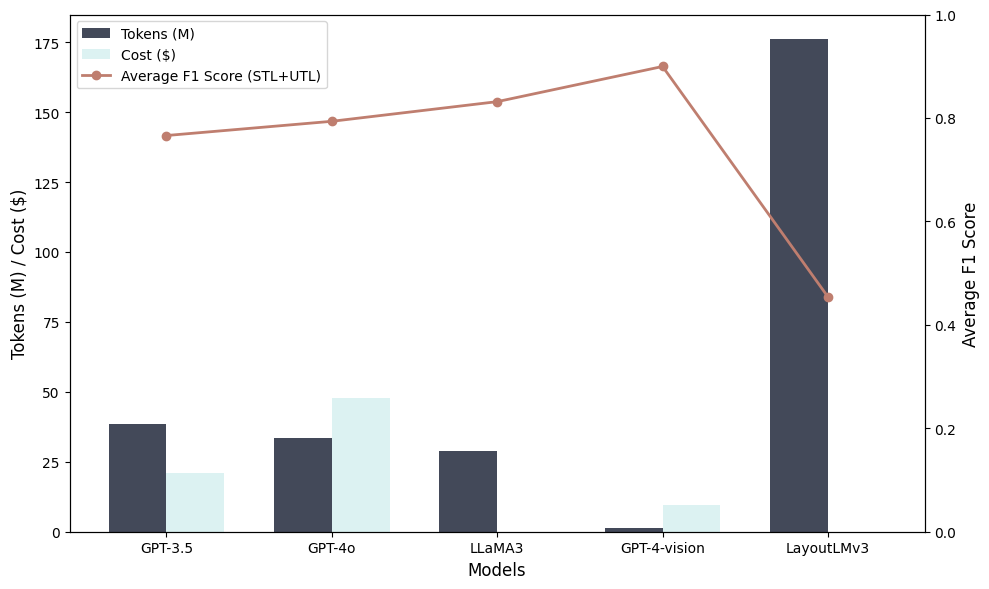

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
models = ['GPT-3.5', 'GPT-4o', 'LLaMA3', 'GPT-4-vision', 'LayoutLMv3']
tokens = [38.6, 33.4, 28.7, 1.17, 176.1]  # None for LayoutLMv3 as it's missing
cost = [21.17, 47.98, 0, 9.52, 0]  # 0 for LayoutLMv3
stl_f1 = [0.778, 0.797, 0.843, 0.902, 0.681]
utl_f1 = [0.754, 0.790, 0.820, 0.897, 0.227]

# Calculate the average F1 score for each model
avg_f1 = [(stl + utl) / 2 for stl, utl in zip(stl_f1, utl_f1)]

# Handle missing values for tokens (none for LayoutLMv3)
tokens = [x if x is not None else 0 for x in tokens]

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for tokens and cost
bar_width = 0.35
index = np.arange(len(models))

# Plot tokens on the primary y-axis
bars1 = ax1.bar(index - bar_width / 2, tokens, bar_width, label="Tokens (M)", color="#434959")

# Plot cost on the primary y-axis
bars2 = ax1.bar(index + bar_width / 2, cost, bar_width, label="Cost ($)", color="#DCF2F2")

# Create the secondary y-axis to plot F1 scores
ax2 = ax1.twinx()
line, = ax2.plot(index, avg_f1, label="Average F1 Score (STL+UTL)", color='#BF7E6F', marker='o', linestyle='-', linewidth=2)

# Set labels
ax1.set_xlabel("Models", fontsize=12)
ax1.set_ylabel("Tokens (M) / Cost ($)", fontsize=12)
ax2.set_ylabel("Average F1 Score", fontsize=12)
ax2.set_ylim(0, 1)
ax1.set_xticks(index)
ax1.set_xticklabels(models, fontsize=10)

# Combine legends
handles = [bars1, bars2, line]
labels = ["Tokens (M)", "Cost ($)", "Average F1 Score (STL+UTL)"]
ax1.legend(handles, labels, loc="upper left")

fig.tight_layout()
plt.savefig("token_cost.svg", format="svg", bbox_inches="tight")
# Show plot
plt.show()


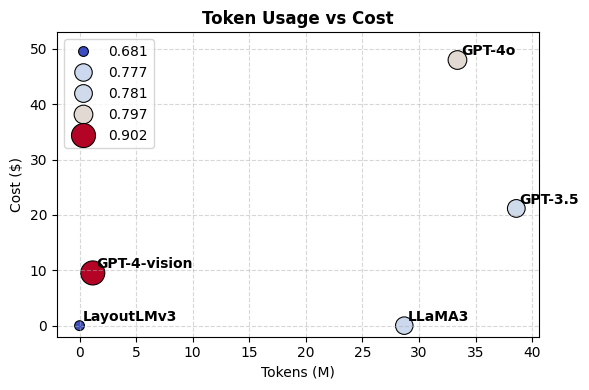

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
tokens = [38.6, 33.4, 28.7, 1.17, 0]  # Tokens in millions
cost = [21.17, 47.98, 0, 9.52, 0]  # Cost in $
models = ["GPT-3.5", "GPT-4o", "LLaMA3", "GPT-4-vision", "LayoutLMv3"]
stl_f1 = [0.781, 0.797, 0.777, 0.902, 0.681]  # STL (F1 scores)

# Define colors based on performance
colors = np.array(stl_f1)  # Use STL F1 scores for coloring

# Create the plot with a smaller figure size
plt.figure(figsize=(6, 4))  # Reduce figure size
sns.scatterplot(x=tokens, y=cost, size=stl_f1, hue=colors, palette="coolwarm", edgecolor='black', sizes=(50, 300))

# Add labels closer to points
for i, model in enumerate(models):
    plt.text(tokens[i] + 0.3, cost[i] + 0.3, model, fontsize=10, ha='left', va='bottom', fontweight='bold')

# Titles and labels
plt.title("Token Usage vs Cost", fontsize=12, fontweight='bold')
plt.xlabel("Tokens (M)", fontsize=10)
plt.ylabel("Cost ($)", fontsize=10)

# Reduce grid intensity and remove excess padding
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(min(tokens) - 2, max(tokens) + 2)  # Tighten X-axis
plt.ylim(min(cost) - 2, max(cost) + 5)  # Tighten Y-axis

plt.tight_layout()  # Reduce whitespace around the plot
plt.show()


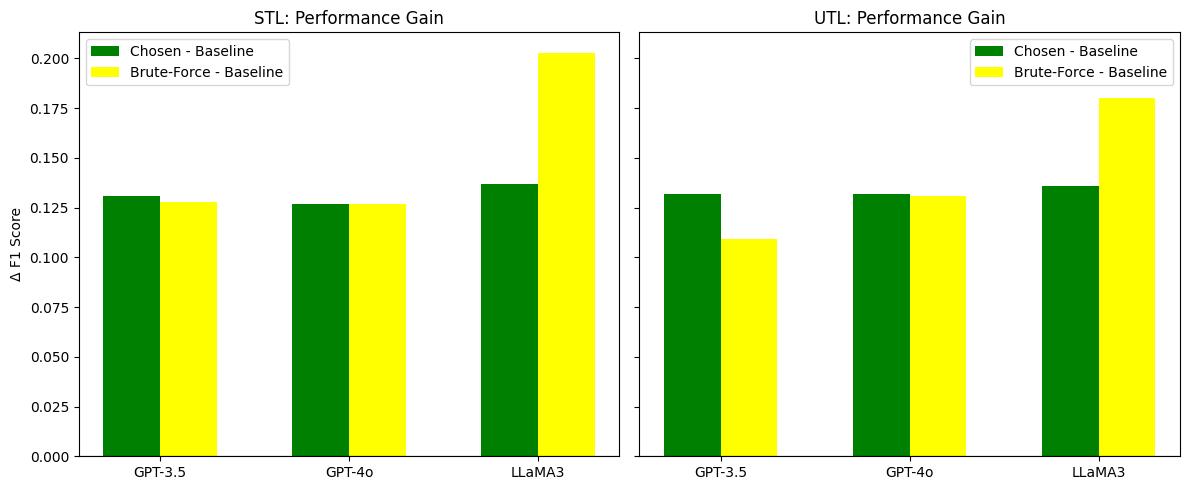

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Models
models = ["GPT-3.5", "GPT-4o", "LLaMA3"]

# Performance Gains (ΔF1 compared to Baseline)
delta_chosen_stl = [0.781 - 0.650, 0.797 - 0.670, 0.777 - 0.640]
delta_brute_stl = [0.778 - 0.650, 0.797 - 0.670, 0.843 - 0.640]

delta_chosen_utl = [0.777 - 0.645, 0.791 - 0.659, 0.776 - 0.640]
delta_brute_utl = [0.754 - 0.645, 0.790 - 0.659, 0.820 - 0.640]

x = np.arange(len(models))  # X-axis positions
width = 0.3  # Bar width

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# STL Bar Chart
ax[0].bar(x - width/2, delta_chosen_stl, width, label="Chosen - Baseline", color="green")
ax[0].bar(x + width/2, delta_brute_stl, width, label="Brute-Force - Baseline", color="yellow")
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel("Δ F1 Score")
ax[0].set_title("STL: Performance Gain")
ax[0].axhline(0, color="black", linewidth=0.8)
ax[0].legend()

# UTL Bar Chart
ax[1].bar(x - width/2, delta_chosen_utl, width, label="Chosen - Baseline", color="green")
ax[1].bar(x + width/2, delta_brute_utl, width, label="Brute-Force - Baseline", color="yellow")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_title("UTL: Performance Gain")
ax[1].axhline(0, color="black", linewidth=0.8)
ax[1].legend()

plt.tight_layout()
plt.show()


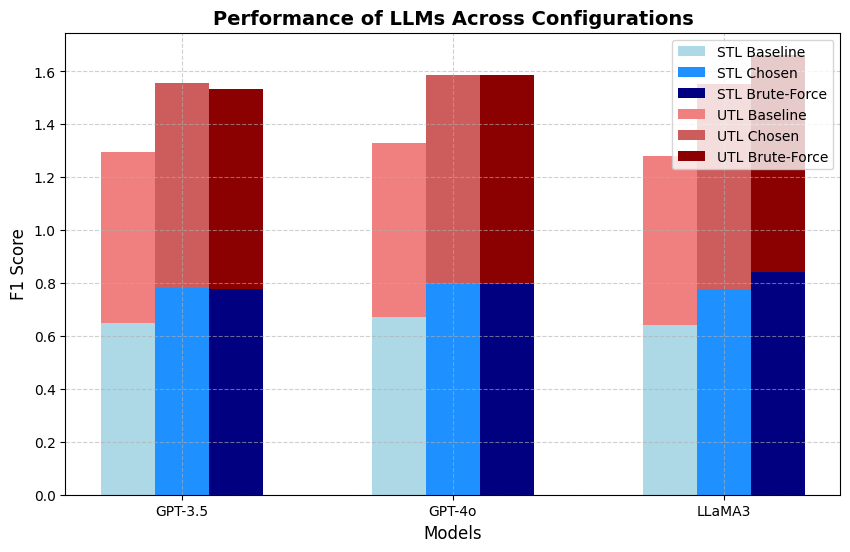

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
models = ["GPT-3.5", "GPT-4o", "LLaMA3"]
stl_baseline = [0.650, 0.670, 0.640]
utl_baseline = [0.645, 0.659, 0.640]
stl_chosen = [0.781, 0.797, 0.777]
utl_chosen = [0.777, 0.791, 0.776]
stl_brute = [0.778, 0.797, 0.843]
utl_brute = [0.754, 0.790, 0.820]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(models))
bar_width = 0.2

# Plot bars for STL and UTL for each configuration
plt.bar(index - bar_width, stl_baseline, bar_width, label='STL Baseline', color='lightblue')
plt.bar(index, stl_chosen, bar_width, label='STL Chosen', color='dodgerblue')
plt.bar(index + bar_width, stl_brute, bar_width, label='STL Brute-Force', color='navy')

plt.bar(index - bar_width, utl_baseline, bar_width, label='UTL Baseline', color='lightcoral', bottom=stl_baseline)
plt.bar(index, utl_chosen, bar_width, label='UTL Chosen', color='indianred', bottom=stl_chosen)
plt.bar(index + bar_width, utl_brute, bar_width, label='UTL Brute-Force', color='darkred', bottom=stl_brute)

# Labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.title("Performance of LLMs Across Configurations", fontsize=14, fontweight='bold')
plt.xticks(index, models)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


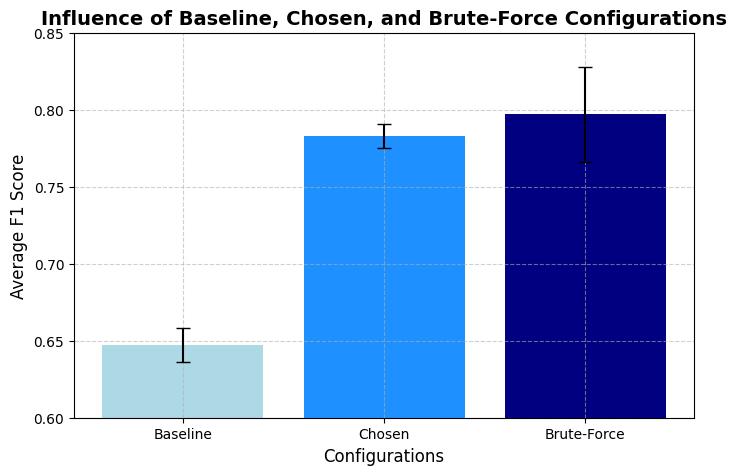

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
configurations = ["Baseline", "Chosen", "Brute-Force"]
stl_avg = [0.650, 0.783, 0.797]
utl_avg = [0.645, 0.783, 0.797]
stl_std = [0.011, 0.008, 0.031]
utl_std = [0.011, 0.008, 0.031]

# Compute overall averages
avg_scores = [np.mean([s, u]) for s, u in zip(stl_avg, utl_avg)]
std_devs = [np.mean([s, u]) for s, u in zip(stl_std, utl_std)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for overall averages with standard deviations
plt.bar(configurations, avg_scores, yerr=std_devs, capsize=5, color=['lightblue', 'dodgerblue', 'navy'])

# Labels and title
plt.xlabel("Configurations", fontsize=12)
plt.ylabel("Average F1 Score", fontsize=12)
plt.title("Influence of Baseline, Chosen, and Brute-Force Configurations", fontsize=14, fontweight='bold')
plt.ylim(0.6, 0.85)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

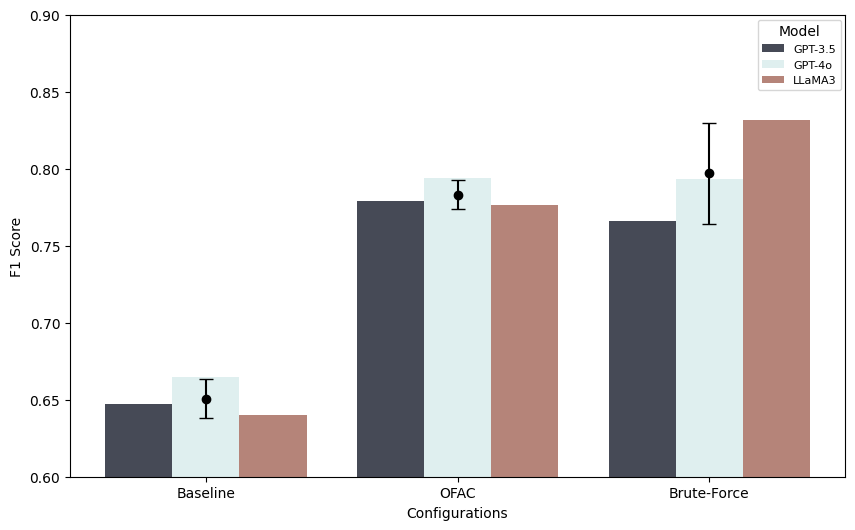

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the dataset
data = {
    "Model": ["GPT-3.5", "GPT-3.5", "GPT-4o", "GPT-4o", "LLaMA3", "LLaMA3"],
    "Baseline": [0.650, 0.645, 0.670, 0.659, 0.640, 0.640],
    "OFAT": [0.781, 0.777, 0.797, 0.791, 0.777, 0.776],
    "Brute-Force": [0.778, 0.754, 0.797, 0.790, 0.843, 0.820]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute the mean F1 scores for each model across STL and UTL
df_avg = df.groupby("Model").mean().reset_index()

# Calculate overall average and standard deviation for each configuration
overall_avg = df_avg.mean(numeric_only=True)
overall_std = df_avg.std(numeric_only=True)

# Reshape data for plotting
df_melted = df_avg.melt(id_vars=["Model"], var_name="Configuration", value_name="F1 Score")

# Define a more intense pastel color palette (blue, yellow, green tones)
palette = sns.color_palette(["#434959", "#DCF2F2", "#BF7E6F"]) # , "#6C6466", "#BF5050"

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Configuration",
    y="F1 Score",
    hue="Model",
    data=df_melted,
    palette=palette,
    errorbar=None
)

# Overlay error bars for overall average but remove from the legend
for i, config in enumerate(overall_avg.index):
    if config != "Model":
        plt.errorbar(i, overall_avg[config], yerr=overall_std[config], fmt='o', 
                     color='black', capsize=5)

plt.xlabel("Configurations")
plt.ylabel("F1 Score")
plt.ylim(0.6, 0.9)

# Update legend to exclude "Avg ± Std"
handles, labels = ax.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l != "Avg ± Std"]
filtered_handles, filtered_labels = zip(*filtered_handles_labels)

plt.legend(filtered_handles, filtered_labels, title="Model", bbox_to_anchor=(0.88, 1), loc='upper left', fontsize=8)

plt.savefig("f1_score_plot.svg", format="svg", bbox_inches="tight")

plt.show()


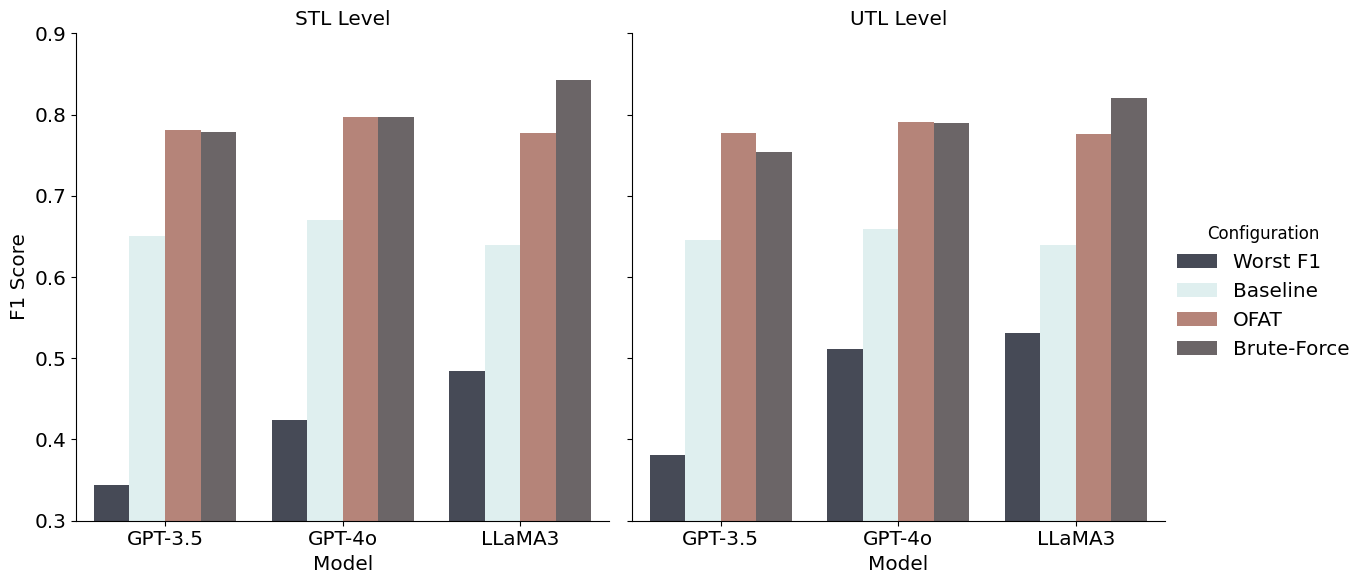

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Increase font sizes
plt.rcParams.update({
    "font.size": 12,                # Default font size
    "axes.labelsize": "large",      # Medium → Large
    "xtick.labelsize": "large",     # Medium → Large
    "ytick.labelsize": "large",     # Medium → Large
    "axes.titlesize": "x-large",    # Large → X-Large
    "legend.fontsize": "large",     # Medium → Large
    "legend.title_fontsize": "medium"  # None → Medium
})

# Define the dataset
data = {
    "Model": ["GPT-3.5", "GPT-3.5", "GPT-4o", "GPT-4o", "LLaMA3", "LLaMA3"],
    "Level": ["STL", "UTL", "STL", "UTL", "STL", "UTL"],
    "Worst F1": [0.344, 0.381, 0.424, 0.512, 0.484, 0.531],
    "Baseline": [0.650, 0.645, 0.670, 0.659, 0.640, 0.640],
    "OFAT": [0.781, 0.777, 0.797, 0.791, 0.777, 0.776],
    "Brute-Force": [0.778, 0.754, 0.797, 0.790, 0.843, 0.820]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Reshape data for plotting
df_melted = df.melt(id_vars=["Model", "Level"], var_name="Configuration", value_name="F1 Score")

# Define a color palette
palette = sns.color_palette(["#434959", "#DCF2F2", "#BF7E6F", "#6C6466"])

# Plot using facet grid for clarity
g = sns.catplot(
    data=df_melted, 
    x="Model", 
    y="F1 Score", 
    hue="Configuration", 
    col="Level", 
    kind="bar", 
    palette=palette, 
    height=6, 
    aspect=1
)

g.set_axis_labels("Model", "F1 Score")
g.set_titles(col_template="{col_name} Level")
g.set(ylim=(0.3, 0.9))
g.legend.set_title("Configuration")

# Save figure
g.savefig("configuration_comparison.svg", format="svg", bbox_inches="tight")

plt.show()


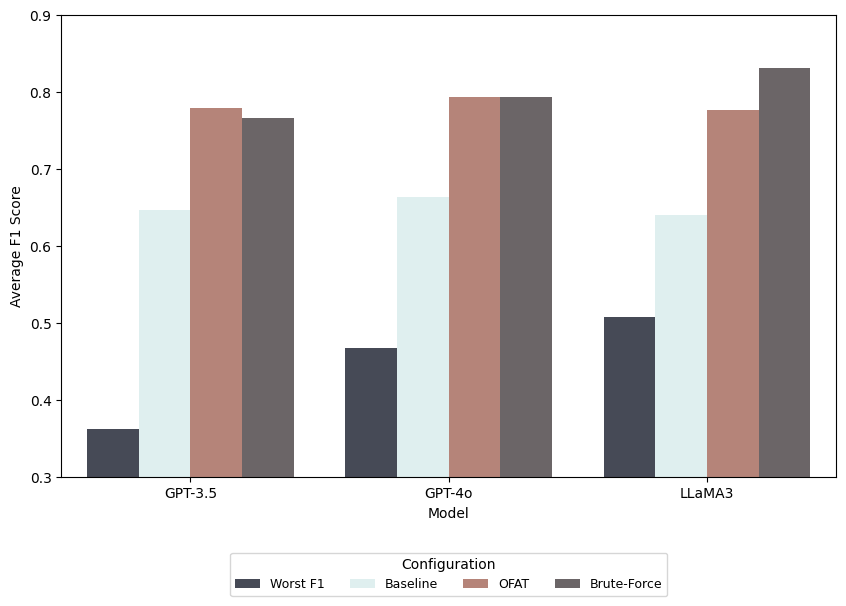

font.size: 10.0
axes.labelsize: medium
xtick.labelsize: medium
ytick.labelsize: medium
axes.titlesize: large
legend.fontsize: medium
legend.title_fontsize: None


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the dataset
data = {
    "Model": ["GPT-3.5", "GPT-3.5", "GPT-4o", "GPT-4o", "LLaMA3", "LLaMA3"],
    "Level": ["STL", "UTL", "STL", "UTL", "STL", "UTL"],
    "Worst F1": [0.344, 0.381, 0.424, 0.512, 0.484, 0.531],
    "Baseline": [0.650, 0.645, 0.670, 0.659, 0.640, 0.640],
    "OFAT": [0.781, 0.777, 0.797, 0.791, 0.777, 0.776],
    "Brute-Force": [0.778, 0.754, 0.797, 0.790, 0.843, 0.820]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Aggregate STL and UTL scores for each model
df_avg = df.groupby("Model").mean(numeric_only=True).reset_index()

df_melted = df_avg.melt(id_vars=["Model"], var_name="Configuration", value_name="F1 Score")

# Define a color palette
palette = sns.color_palette(["#434959", "#DCF2F2", "#BF7E6F", "#6C6466"])

# Plot aggregated scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Model", 
    y="F1 Score", 
    hue="Configuration", 
    data=df_melted, 
    palette=palette
)

plt.xlabel("Model")
plt.ylabel("Average F1 Score")
plt.ylim(0.3, 0.9)
plt.legend(title="Configuration", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=9)

plt.savefig("configuration_comparison_agg.svg", format="svg", bbox_inches="tight")

plt.show()


### Token/Cost Calc.

#### For LLama

In [118]:
import os
import pandas as pd

# Define the directory containing the CSV files
directory = "llama3_70b_outputs/reg/token_counts"

# Initialize a counter for the total prompt token size
total_prompt_token_size_ocr = 0

# Iterate through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Ensure it's a CSV file
        file_path = os.path.join(directory, filename)
        
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Check if the column 'prompt_token_size' exists
            if 'token_counts' in df.columns:
                total_prompt_token_size_ocr += df['token_counts'].sum()

        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print the total sum of prompt token sizes across all CSV files
print(f"Total prompt token size across all ocr CSV files: {total_prompt_token_size_ocr}")



directory = "VT2/gpt4_Markdown_Llama3_outputs/reg/token_counts"

# Initialize a counter for the total prompt token size
total_prompt_token_size_markdown = 0

# Iterate through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Ensure it's a CSV file
        file_path = os.path.join(directory, filename)
        
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)

            # Check if the column 'prompt_token_size' exists
            if 'token_counts' in df.columns:
                total_prompt_token_size_markdown += df['token_counts'].sum()

        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print the total sum of prompt token sizes across all CSV files
print(f"Total prompt token size across all markdown CSV files: {total_prompt_token_size_markdown}")
print(f"Overall prompt token size: {total_prompt_token_size_markdown + total_prompt_token_size_markdown}")


Total prompt token size across all ocr CSV files: 28716968


FileNotFoundError: [Errno 2] No such file or directory: 'VT2/gpt4_Markdown_Llama3_outputs/reg/token_counts'

#### For GPTs

In [72]:
def calculate_total_cost(batch_dir):
    """
    Process JSONL files in the given directory to calculate token costs
    based on prompt tokens, completion tokens, and their respective costs.
    """
    total_prompt_tokens = 0
    total_completion_tokens = 0

    # Traverse the batch directory
    for root, _, files in os.walk(batch_dir):
        for file in files:
            if file.endswith(".jsonl"):  # Process only JSONL files
                batch_file_path = os.path.join(root, file)

                # Read the JSONL file line by line
                with open(batch_file_path, "r") as f:
                    try:
                        for line in f:
                            if line.strip():  # Ignore empty lines
                                # Parse the JSON object from the current line
                                data = json.loads(line)

                                # Extract token usage details
                                usage = data["response"]["body"]["usage"]
                                prompt_tokens = usage.get("prompt_tokens", 0)
                                completion_tokens = usage.get("completion_tokens", 0)

                                # Aggregate tokens
                                total_prompt_tokens += prompt_tokens
                                total_completion_tokens += completion_tokens
                    except Exception as e:
                        print(f"Error processing file {batch_file_path}: {e}")

    # Calculate costs
    input_cost = (total_prompt_tokens / 1000) * INPUT_COST_PER_1000_TOKENS
    output_cost = (total_completion_tokens / 1000) * OUTPUT_COST_PER_1000_TOKENS

    return total_prompt_tokens, total_completion_tokens, input_cost, output_cost

##### For GPT3

In [73]:
INPUT_COST_PER_1000_TOKENS = 0.0005  # Batch API cost for input tokens per 1,000 tokens
OUTPUT_COST_PER_1000_TOKENS = 0.0015   # Batch API cost for output tokens per 1,000 tokens


print("---OCR:")
response_dir = "gpt3.5_outputs/reg/responses" 
total_prompt_tokens, total_completion_tokens, input_cost, output_cost = calculate_total_cost(response_dir) 

print(f"Total Prompt Tokens: {total_prompt_tokens}")
print(f"Total Prompt Cost: ${input_cost: .2f}")
print(f"Total Completıons Tokens: {total_completion_tokens}")
print(f"Total Completıons Cost: ${output_cost: .2f}")
print(f"Overall Cost: ${input_cost+output_cost: .2f}")


print("---Markdown:")
response_dir = "VT2/gpt4_Markdown_gpt3_outputs/reg/responses"  # Path to response JSONL files
total_prompt_tokens, total_completion_tokens, input_cost, output_cost = calculate_total_cost(response_dir) 

print(f"Total Prompt Tokens: {total_prompt_tokens}")
print(f"Total Prompt Cost: ${input_cost: .2f}")
print(f"Total Completıons Tokens: {total_completion_tokens}")
print(f"Total Completıons Cost: ${output_cost: .2f}")
print(f"Overall Cost: ${input_cost+output_cost: .2f}")

1925632

---OCR:
Total Prompt Tokens: 36624305
Total Prompt Cost: $ 18.31
Total Completıons Tokens: 1903787
Total Completıons Cost: $ 2.86
Overall Cost: $ 21.17
---Markdown:
Total Prompt Tokens: 23191834
Total Prompt Cost: $ 11.60
Total Completıons Tokens: 1533213
Total Completıons Cost: $ 2.30
Overall Cost: $ 13.90


##### For GPT4

In [47]:

INPUT_COST_PER_1000_TOKENS = 0.00125  # Cost for text input tokens
OUTPUT_COST_PER_1000_TOKENS = 0.005

print("---OCR:")
response_dir = "gpt4_outputs/reg/responses"
total_prompt_tokens, total_completion_tokens, input_cost, output_cost = calculate_total_cost(response_dir) 

print(f"Total Prompt Tokens: {total_prompt_tokens}")
print(f"Total Prompt Cost: ${input_cost: .2f}")
print(f"Total Completıons Tokens: {total_completion_tokens}")
print(f"Total Completıons Cost: ${output_cost: .2f}")
print(f"Overall Cost: ${input_cost+output_cost: .2f}")

print("---\nMarkdown:")
response_dir = "VT2/gpt4_Markdown_gpt4_outputs/reg/responses"
total_prompt_tokens, total_completion_tokens, input_cost, output_cost = calculate_total_cost(response_dir) 

print(f"Total Prompt Tokens: {total_prompt_tokens}")
print(f"Total Prompt Cost: ${input_cost: .2f}")
print(f"Total Completıons Tokens: {total_completion_tokens}")
print(f"Total Completıons Cost: ${output_cost: .2f}")
print(f"Overall Cost: ${input_cost+output_cost: .2f}")

---OCR:
Total Prompt Tokens: 31608949
Total Prompt Cost: $ 39.51
Total Completıons Tokens: 1694286
Total Completıons Cost: $ 8.47
Overall Cost: $ 47.98
---
Markdown:
Total Prompt Tokens: 18094951
Total Prompt Cost: $ 22.62
Total Completıons Tokens: 1234018
Total Completıons Cost: $ 6.17
Overall Cost: $ 28.79


##### For GPT-vısıon

In [41]:
import os
import base64
import json
from io import BytesIO
from PIL import Image

PRICE_PER_MILLION_TOKENS = 10  # Adjust based on OpenAI's pricing
TOKEN_COST_PER_TILE = 170
TOKEN_COST_ADDITIONAL = 85
TOKEN_COST_LOW_DETAIL = 85  # For low-detail images
TILE_SIZE = 512  # Tile dimension (512x512)
INPUT_COST_PER_1000_TOKENS = 0.00125  # Cost for text input tokens
OUTPUT_COST_PER_1000_TOKENS = 0.005

# GPT-4 tokenizer
enc = tiktoken.encoding_for_model("gpt-4")

def count_text_tokens(text):
    """Counts tokens in a text input using GPT-4 tokenizer."""
    return len(enc.encode(text))

def calculate_image_token_cost_approximation(image_base64, detail="high"):
    """
    Approximate token cost for a Base64-encoded image using file size estimation.
    """
    if detail == "low":
        return TOKEN_COST_LOW_DETAIL
    else:
        # Approximate the image size based on Base64 length (in KB)
        image_size_kb = len(image_base64) * 3 / 4 / 1024  # Approximation

        # Determine dimensions based on estimated size (resized/scaled)
        if image_size_kb <= 300:  # 1024x1024 resized to 768x768
            tiles = 4
        elif image_size_kb <= 600:  # 1024x2048 resized to 768x1536
            tiles = 6
        else:  # Up to 2048x2048 resized to 1536x1536
            tiles = 9

        # Calculate token cost
        return (tiles * TOKEN_COST_PER_TILE) + TOKEN_COST_ADDITIONAL

def process_batch_directory(batch_dir, detail="high"):
    """
    Process all batches in the directory containing JSONL files
    and calculate total token usage for both images and text inputs.
    """
    total_image_tokens = 0
    total_text_tokens = 0

    # Traverse the batch directory
    for root, _, files in os.walk(batch_dir):
        for file in files:
            if file.endswith(".jsonl"):  # Process only JSONL files
                batch_file_path = os.path.join(root, file)

                # Read the JSONL file line by line
                with open(batch_file_path, "r") as f:
                    try:
                        for line in f:
                            if line.strip():  # Ignore empty lines
                                # Parse the JSON object from the current line
                                data = json.loads(line)
                                
                                messages = data["body"]["messages"]  # Get the correct path
                                
                                # Process system messages for text input
                                for message in messages:
                                    if message["role"] == "system":
                                        total_text_tokens += count_text_tokens(message["content"])

                                # Process user messages for text and image inputs
                                for message in messages:
                                    if message["role"] == "user" and "content" in message:
                                        for content in message["content"]:
                                            if content["type"] == "text":
                                                total_text_tokens += count_text_tokens(content["text"])
                                            elif content["type"] == "image_url":
                                                image_url = content["image_url"]["url"]
                                                if image_url.startswith("data:image/jpeg;base64,"):
                                                    image_base64 = image_url.split("data:image/jpeg;base64,")[1]
                                                    token_cost = calculate_image_token_cost_approximation(image_base64, detail=detail)
                                                    total_image_tokens += token_cost
                    except Exception as e:
                        print(f"Error processing file {batch_file_path}: {e}")

    return total_image_tokens, total_text_tokens

def calculate_cost_from_tokens(image_tokens, text_tokens):
    """
    Convert total tokens to monetary cost for images and text inputs.
    """
    image_cost = (image_tokens / 1_000_000) * PRICE_PER_MILLION_TOKENS
    text_cost = (text_tokens / 1_000) * INPUT_COST_PER_1000_TOKENS
    return image_cost, text_cost


def calculate_response_cost(batch_dir):
    """
    Process JSONL files in the given directory to calculate token costs
    based on prompt tokens, completion tokens, and their respective costs.
    """
    total_prompt_tokens = 0
    total_completion_tokens = 0

    # Traverse the batch directory
    for root, _, files in os.walk(batch_dir):
        for file in files:
            if file.endswith(".jsonl"):  # Process only JSONL files
                batch_file_path = os.path.join(root, file)

                # Read the JSONL file line by line
                with open(batch_file_path, "r") as f:
                    try:
                        for line in f:
                            if line.strip():  # Ignore empty lines
                                # Parse the JSON object from the current line
                                data = json.loads(line)

                                # Extract token usage details
                                usage = data["response"]["body"]["usage"]
                                prompt_tokens = usage.get("prompt_tokens", 0)
                                completion_tokens = usage.get("completion_tokens", 0)

                                # Aggregate tokens
                                total_prompt_tokens += prompt_tokens
                                total_completion_tokens += completion_tokens
                    except Exception as e:
                        print(f"Error processing file {batch_file_path}: {e}")

    # Calculate costs
    input_cost = (total_prompt_tokens / 1000) * INPUT_COST_PER_1000_TOKENS
    output_cost = (total_completion_tokens / 1000) * OUTPUT_COST_PER_1000_TOKENS

    return total_prompt_tokens, total_completion_tokens, input_cost, output_cost

# Main execution
if __name__ == "__main__":
    # Specify your batch directory here
    batch_dir = "VT2/gpt4_outputs_Image/reg/batches"  # Update this to your actual directory path
    response_dir = "VT2/gpt4_outputs_Image/reg/responses"

    total_tokens_approx_img, total_tokens_approx_text = process_batch_directory(batch_dir, detail="high")
    total_cost_approx_img, total_cost_approx_text = calculate_cost_from_tokens(total_tokens_approx_img, total_tokens_approx_text)
    
    print(f"[Approximation] Total Tokens Image: {total_tokens_approx_img}")
    print(f"[Approximation] Total Tokens Text: {total_tokens_approx_text}")
    print(f"[Approximation] Estimated Cost Image: ${total_cost_approx_img:.2f}")
    print(f"[Approximation] Estimated Cost Text: ${total_cost_approx_text:.2f}")

    
    print(f"Overall Input Token: {total_tokens_approx_img + total_tokens_approx_text}")
    print(f"Overall Input Cost: ${total_cost_approx_img + total_cost_approx_text: .2f}")

    total_prompt_tokens, total_completion_tokens, input_cost, output_cost = calculate_response_cost(response_dir) 
    
    print(f"Overall Output Token: {total_completion_tokens}")
    print(f"Overall Output Cost: ${output_cost: .2f}")
    


[Approximation] Total Tokens Image: 896580
[Approximation] Total Tokens Text: 216132
[Approximation] Estimated Cost Image: $8.97
[Approximation] Estimated Cost Text: $0.27
Overall Input Token: 1112712
Overall Input Cost: $ 9.24
Overall Output Token: 55464
Overall Output Cost: $ 0.28


### For LayoutLMv3

#### For Lv3

In [16]:
from datasets import load_from_disk
from transformers import LayoutLMv3Processor
import torch

def compute_total_tokens(dataset, processor, max_length=512):
    total_text_tokens = 0
    total_visual_tokens = 0
    
    for example in dataset:
        encoding = processor(
            images=example["images"],
            text=example["tokens"],
            boxes=example["bboxes"],
            truncation=True, 
            padding="max_length",
            max_length=max_length,
            return_overflowing_tokens=True
        )
        
        total_text_tokens += sum(len(ids) for ids in encoding["input_ids"])
        if "pixel_values" in encoding and encoding["pixel_values"] is not None:
            total_visual_tokens += sum(torch.tensor(img).numel() for img in encoding["pixel_values"])

    return total_text_tokens, total_visual_tokens

processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

dataset_paths = [
    ("layoutlmv3_outputs/deneme-2/FARA-lv3-Short-Form-combined/unmapped_train.hf",
"layoutlmv3_outputs/FARA-lv3-unk_Short-Form-train_10-test_300-valid_100-SD_0/unmapped_valid.hf",
"layoutlmv3_outputs/deneme-2/FARA-lv3-Short-Form-combined/unmapped_test.hf"),
    ("layoutlmv3_outputs/deneme-2/FARA-lv3-Dissemination-combined/unmapped_train.hf",
"layoutlmv3_outputs/FARA-lv3-unk_Dissemination_Report-train_10-test_300-valid_100-SD_0/unmapped_valid.hf",
"layoutlmv3_outputs/deneme-2/FARA-lv3-Dissemination-combined/unmapped_test.hf"),
    ("layoutlmv3_outputs/deneme-2/FARA-lv3-Amendment-combined/unmapped_train.hf",
"layoutlmv3_outputs/FARA-lv3-unk_Amendment-train_10-test_300-valid_100-SD_0/unmapped_valid.hf",
"layoutlmv3_outputs/deneme-2/FARA-lv3-Amendment-combined/unmapped_test.hf")
]

for train_path, valid_path, test_path in dataset_paths:
    train_dataset = load_from_disk(train_path)
    valid_dataset = load_from_disk(valid_path)
    test_dataset = load_from_disk(test_path)

    train_text_tokens, train_visual_tokens = compute_total_tokens(train_dataset, processor)
    valid_text_tokens, valid_visual_tokens = compute_total_tokens(valid_dataset, processor)
    test_text_tokens, test_visual_tokens = compute_total_tokens(test_dataset, processor)

    total_text_tokens_used = train_text_tokens + test_text_tokens
    total_visual_tokens_used = train_visual_tokens + test_visual_tokens
    total_tokens_used = total_text_tokens_used + total_visual_tokens_used
    
    print(f"\nFor {train_path}")
    print(f"Total text tokens used in training: {train_text_tokens}")
    print(f"Total visual tokens used in training: {train_visual_tokens}")
    print(f"Total text tokens used in validation: {valid_text_tokens}")
    print(f"Total visual tokens used in validation: {valid_visual_tokens}")
    print(f"Total text tokens used in testing: {test_text_tokens}")
    print(f"Total visual tokens used in testing: {test_visual_tokens}")
    print(f"Total tokens used overall (text + visual): {total_tokens_used}")


For layoutlmv3_outputs/deneme-2/FARA-lv3-Short-Form-combined/unmapped_train.hf
Total text tokens used in training: 9216
Total visual tokens used in training: 2709504
Total text tokens used in validation: 275456
Total visual tokens used in validation: 80984064
Total text tokens used in testing: 111616
Total visual tokens used in testing: 32815104
Total tokens used overall (text + visual): 35645440

For layoutlmv3_outputs/deneme-2/FARA-lv3-Dissemination-combined/unmapped_train.hf
Total text tokens used in training: 11264
Total visual tokens used in training: 3311616
Total text tokens used in validation: 192000
Total visual tokens used in validation: 56448000
Total text tokens used in testing: 75264
Total visual tokens used in testing: 22127616
Total tokens used overall (text + visual): 25525760

For layoutlmv3_outputs/deneme-2/FARA-lv3-Amendment-combined/unmapped_train.hf
Total text tokens used in training: 12800
Total visual tokens used in training: 3763200
Total text tokens used in va

#### For lv1

In [15]:
from datasets import load_from_disk
from transformers import LayoutLMv3Processor
import torch

def compute_total_tokens(dataset, processor, max_length=512):
    total_text_tokens = 0
    total_visual_tokens = 0
    
    for example in dataset:
        encoding = processor(
            images=example["images"],
            text=example["tokens"],
            boxes=example["bboxes"],
            truncation=True, 
            padding="max_length",
            max_length=max_length,
            return_overflowing_tokens=True
        )
        
        total_text_tokens += sum(len(ids) for ids in encoding["input_ids"])
        if "pixel_values" in encoding and encoding["pixel_values"] is not None:
            total_visual_tokens += sum(torch.tensor(img).numel() for img in encoding["pixel_values"])

    return total_text_tokens, total_visual_tokens

processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

dataset_paths = [
    ("layoutlmv3_outputs/deneme-2/FARA-lv1-Short-Form-combined/unmapped_train.hf", 
     "layoutlmv3_outputs/FARA-lv1-single_Short-Form-train_10-test_300-valid_100-SD_0/unmapped_valid.hf", 
     "layoutlmv3_outputs/deneme-2/FARA-lv1-Short-Form-combined/unmapped_test.hf"),
    ("layoutlmv3_outputs/deneme-2/FARA-lv1-Dissemination-combined/unmapped_train.hf", 
     "layoutlmv3_outputs/FARA-lv1-single_Dissemination_Report-train_10-test_150-valid_50-SD_0/unmapped_valid.hf", 
     "layoutlmv3_outputs/deneme-2/FARA-lv1-Dissemination-combined/unmapped_test.hf"),
    ("layoutlmv3_outputs/deneme-2/FARA-lv1-Amendment-combined/unmapped_train.hf", 
     "layoutlmv3_outputs/FARA-lv1-single_Amendment-train_10-test_300-valid_100-SD_0/unmapped_valid.hf", 
     "layoutlmv3_outputs/deneme-2/FARA-lv1-Amendment-combined/unmapped_test.hf")
]

for train_path, valid_path, test_path in dataset_paths:
    train_dataset = load_from_disk(train_path)
    valid_dataset = load_from_disk(valid_path)
    test_dataset = load_from_disk(test_path)

    train_text_tokens, train_visual_tokens = compute_total_tokens(train_dataset, processor)
    valid_text_tokens, valid_visual_tokens = compute_total_tokens(valid_dataset, processor)
    test_text_tokens, test_visual_tokens = compute_total_tokens(test_dataset, processor)

    total_text_tokens_used = train_text_tokens + test_text_tokens
    total_visual_tokens_used = train_visual_tokens + test_visual_tokens
    total_tokens_used = total_text_tokens_used + total_visual_tokens_used
    
    print(f"\nFor {train_path}")
    print(f"Total text tokens used in training: {train_text_tokens}")
    print(f"Total visual tokens used in training: {train_visual_tokens}")
    print(f"Total text tokens used in validation: {valid_text_tokens}")
    print(f"Total visual tokens used in validation: {valid_visual_tokens}")
    print(f"Total text tokens used in testing: {test_text_tokens}")
    print(f"Total visual tokens used in testing: {test_visual_tokens}")
    print(f"Total tokens used overall (text + visual): {total_tokens_used}")



For layoutlmv3_outputs/deneme-2/FARA-lv1-Short-Form-combined/unmapped_train.hf
Total text tokens used in training: 13312
Total visual tokens used in training: 3913728
Total text tokens used in validation: 287744
Total visual tokens used in validation: 84596736
Total text tokens used in testing: 111616
Total visual tokens used in testing: 32815104
Total tokens used overall (text + visual): 36853760

For layoutlmv3_outputs/deneme-2/FARA-lv1-Dissemination-combined/unmapped_train.hf
Total text tokens used in training: 9216
Total visual tokens used in training: 2709504
Total text tokens used in validation: 99328
Total visual tokens used in validation: 29202432
Total text tokens used in testing: 75264
Total visual tokens used in testing: 22127616
Total tokens used overall (text + visual): 24921600

For layoutlmv3_outputs/deneme-2/FARA-lv1-Amendment-combined/unmapped_train.hf
Total text tokens used in training: 7680
Total visual tokens used in training: 2257920
Total text tokens used in vali